In [46]:
import folium
import json
import glob
import os
import pandas as pd
import numpy as np

### 서울/경기 상가정보

In [47]:
df1 = pd.read_csv('data/경기.csv')
df2 = pd.read_csv('data/서울.csv')

C:\Users\YONSAI\AppData\Local\Temp\ipykernel_3120\1408427144.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('data/경기.csv')
C:\Users\YONSAI\AppData\Local\Temp\ipykernel_3120\1408427144.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('data/서울.csv')


In [48]:
df1.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0004063,팽성농산물센터,NaN,G2,소매,G205,식료품 소매,G20506,채소/과일 소매업,G47215,...,4122025039100930001033303,NaN,경기도 평택시 팽성읍 석근2길 36,451803,17997,NaN,NaN,NaN,127.048075,36.936336
1,MA0101202210A0089792,역전할머니맥주평택궁리점,NaN,I2,음식,I211,주점,I21103,생맥주 전문,I56213,...,4122033026100720011024544,NaN,경기도 평택시 고덕면 궁2길 67,451841,17821,NaN,NaN,NaN,127.034381,37.018039
2,MA0101202210A0101847,지제역부동산마트공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,4122011900100000000000107,NaN,경기도 평택시 지제동삭2로 181-24,450802,18029,NaN,1,NaN,127.093832,37.016832
3,MA0101202210A0050965,혜윰건축사사무소,NaN,M1,과학·기술,M109,기술 서비스,M10901,건축 설계 및 관련 서비스업,M72111,...,4127110100106240012004645,고요한정원,경기도 안산시 상록구 웃말5길 9-1,426860,15328,NaN,NaN,NaN,126.871046,37.306182
4,MA0101202210A0067941,양촌리민물장어,NaN,I2,음식,I201,한식,I20112,해산물 구이/찜,I56111,...,4148010800109200000000001,NaN,경기도 파주시 경의로 968,413200,10906,NaN,NaN,NaN,126.759748,37.703802


In [49]:
df1['상권업종중분류명'].unique()

array(['식료품 소매', '주점', '부동산 서비스', '기술 서비스', '한식', '비알코올 ', '전문 디자인',
       '기타 간이', '기타 사업 서비스', '오락용품 소매', '기타 교육', '섬유·의복·신발 소매', '여행사·보조',
       '유원지·오락', '광고', '스포츠 서비스', '자동차 수리·세차', '종합 소매', '사진 촬영',
       '가전·통신 소매', '시계·귀금속 소매', '의약·화장품 소매', '일반 숙박', '청소·방제', '이용·미용',
       '욕탕·신체관리', '기타 가정용품 수리', '의원', '중식', '철물·건설자재 소매', '서양식', '일식',
       '기타 숙박', '세탁', '가정용품 대여', '연료 소매', '본사·경영 컨설팅', '안경·정밀기기 소매',
       '법무관련 ', '고용 알선', '구내식당·뷔페', '회계·세무', '운송장비 대여', '중고 상품 소매',
       '가전제품 수리', '기타 생활용품 소매', '컴퓨터 수리', '일반 교육', '식물 소매', '기타 보건',
       '자동차 부품 소매', '동남아시아', '사무 지원', '인쇄·제품제작', '애완동물·용품 소매', '장식품 소매',
       '담배 소매', '도서관·사적지', '가구 소매', '산업용품 대여', '시설관리', '장례식장 ', '음료 소매',
       '시장 조사', '교육 지원', '모터사이클 수리', '기타 상품 소매', '수의', '기타 전문 과학',
       '모터사이클 소매', '병원', '기타 개인', '통신장비 수리', '조경·유지', '기타 외국'],
      dtype=object)

In [50]:
df1 = df1[['상호명','상권업종대분류명','도로명주소','경도','위도']]
df1.head()

,상호명,상권업종대분류명,도로명주소,경도,위도
0,팽성농산물센터,소매,경기도 평택시 팽성읍 석근2길 36,127.048075,36.936336
1,역전할머니맥주평택궁리점,음식,경기도 평택시 고덕면 궁2길 67,127.034381,37.018039
2,지제역부동산마트공인중개사사무소,부동산,경기도 평택시 지제동삭2로 181-24,127.093832,37.016832
3,혜윰건축사사무소,과학·기술,경기도 안산시 상록구 웃말5길 9-1,126.871046,37.306182
4,양촌리민물장어,음식,경기도 파주시 경의로 968,126.759748,37.703802


In [51]:
df2 = df2[['상호명','상권업종대분류명','도로명주소','경도','위도']]
df2.head()

,상호명,상권업종대분류명,도로명주소,경도,위도
0,영자's곱창,음식,서울특별시 광진구 면목로 172,127.082832,37.568503
1,호텔클로이,숙박,서울특별시 중구 을지로42길 11,127.005849,37.565708
2,나라차중계태권도장,교육,서울특별시 노원구 한글비석로 242,127.076956,37.649226
3,이상한스냅,과학·기술,서울특별시 양천구 월정로 283,126.828832,37.542117
4,토끼정,음식,서울특별시 강서구 마곡동로 55,126.833022,37.560053


In [52]:
df = pd.concat([df1,df2])
df.head()

,상호명,상권업종대분류명,도로명주소,경도,위도
0,팽성농산물센터,소매,경기도 평택시 팽성읍 석근2길 36,127.048075,36.936336
1,역전할머니맥주평택궁리점,음식,경기도 평택시 고덕면 궁2길 67,127.034381,37.018039
2,지제역부동산마트공인중개사사무소,부동산,경기도 평택시 지제동삭2로 181-24,127.093832,37.016832
3,혜윰건축사사무소,과학·기술,경기도 안산시 상록구 웃말5길 9-1,126.871046,37.306182
4,양촌리민물장어,음식,경기도 파주시 경의로 968,126.759748,37.703802


In [53]:
df.to_csv('data/수도권.csv', index=False)
df.head()

,상호명,상권업종대분류명,도로명주소,경도,위도
0,팽성농산물센터,소매,경기도 평택시 팽성읍 석근2길 36,127.048075,36.936336
1,역전할머니맥주평택궁리점,음식,경기도 평택시 고덕면 궁2길 67,127.034381,37.018039
2,지제역부동산마트공인중개사사무소,부동산,경기도 평택시 지제동삭2로 181-24,127.093832,37.016832
3,혜윰건축사사무소,과학·기술,경기도 안산시 상록구 웃말5길 9-1,126.871046,37.306182
4,양촌리민물장어,음식,경기도 파주시 경의로 968,126.759748,37.703802


In [54]:
df['상권업종대분류명'].unique()

array(['소매', '음식', '부동산', '과학·기술', '시설관리·임대', '교육', '예술·스포츠', '수리·개인',
       '숙박', '보건의료'], dtype=object)

### 지도 만들기

In [55]:
from geopy.distance import great_circle

class CountByWGS84:

    def __init__(self, df, lat, lng, dist=1):
        """
        df: 데이터 프레임
        lat: 중심 위도
        lng: 중심 경도
        dist: 기준 거리(km)
        """
        self.df = df
        self.lat = lat
        self.lng = lng
        self.dist = dist

    def filter_by_rectangle(self):
        """
        사각 범위 내 데이터 필터링
        """
        lat_min = self.lat - 0.01 * self.dist
        lat_max = self.lat + 0.01 * self.dist

        lng_min = self.lng - 0.015 * self.dist
        lng_max = self.lng + 0.015 * self.dist

        self.points = [[lat_min, lng_min], [lat_max, lng_max]]

        result = self.df.loc[
            (self.df['lat'] > lat_min) &
            (self.df['lat'] < lat_max) &
            (self.df['lng'] > lng_min) &
            (self.df['lng'] < lng_max)
        ]
        result.index = range(len(result))

        return result
    
    def filter_by_radius(self):
        """
        반경 범위 내 데이터 필터링
        """
        # 사각 범위 내 데이터 필터링
        tmp = self.filter_by_rectangle()

        # 기준 좌표 포인트
        center = (self.lat, self.lng)

        result = pd.DataFrame()
        for index, row in tmp.iterrows():
            # 개별 좌표 포인트
            point = (row['lat'], row['lng'])
            d = great_circle(center, point).kilometers
            if d <= self.dist:
                result = pd.concat([result, tmp.iloc[index, :].to_frame().T])

        result.index = range(len(result))

        return result
    
    def plot_by_rectangle(self, df):
        """
        사각 범위 내 데이터 플로팅
        """

        m = folium.Map(location=[self.lat, self.lng], zoom_start=14)

        for idx, row in df.iterrows():

            lat_ = row['lat']
            lng_ = row['lng']

            folium.Marker(location=[lat_, lng_],
                          radius=15,
                          tooltip=row['상호명']).add_to(m)

        folium.Rectangle(bounds=self.points,
                         color='#ff7800',
                         fill=True,
                         fill_color='#ffff00',
                         fill_opacity=0.2).add_to(m)

        return m
    
    def plot_by_radius(self, df):
        """
        반경 범위 내 데이터 플로팅
        """

        m = folium.Map(location=[self.lat, self.lng], zoom_start=14)

        for idx, row in df.iterrows():

            lat_ = row['lat']
            lng_ = row['lng']

            # folium.Marker(location=[lat_, lng_],
            #               radius=15,
            #               tooltip=row['상호명']).add_to(m)
            logo = folium.CustomIcon(f'data/{df.상권업종대분류명[idx]}.png', icon_size=(30,30))
            folium.Marker(location=[lat_, lng_],
                          radius=15, icon=logo,
                          tooltip=row['상호명']).add_to(m)

        folium.Circle(radius=dist * 1000,
                      location=[lat, lng],
                      color="#ff7800",
                      fill_color='#ffff00',
                      fill_opacity=0.2
                      ).add_to(m)
        
        # for i in df.index:
        #     logo = folium.CustomIcon(f'data/{df.상권업종대분류명[i]}.svg', icon_size=(30,30))
        #     folium.Marker(
        #         location=[df.lat[i], df.lng[i]],
        #         icon=logo
        #     ).add_to(m)


        return m

In [56]:
# Sample Dataset
df = pd.read_csv("data/수도권.csv").copy()
df.head()

,상호명,상권업종대분류명,도로명주소,경도,위도
0,팽성농산물센터,소매,경기도 평택시 팽성읍 석근2길 36,127.048075,36.936336
1,역전할머니맥주평택궁리점,음식,경기도 평택시 고덕면 궁2길 67,127.034381,37.018039
2,지제역부동산마트공인중개사사무소,부동산,경기도 평택시 지제동삭2로 181-24,127.093832,37.016832
3,혜윰건축사사무소,과학·기술,경기도 안산시 상록구 웃말5길 9-1,126.871046,37.306182
4,양촌리민물장어,음식,경기도 파주시 경의로 968,126.759748,37.703802


In [57]:
# 숙박 필터링
df = df.loc[df['상권업종대분류명'].str.contains("부동산", na=False)]
df = df.rename(columns={'경도': 'lng', '위도': 'lat'})
df.index = range(len(df))

In [58]:
# lat = 37.50229485705552
# lng = 127.02449138906029

# 가능역
lat = 37.7483685951812
lng = 127.044220735748
dist = 1

In [59]:
# 반경 집계 인스턴스 생성
cbw = CountByWGS84(df, lat, lng, dist)

In [60]:
# 사각 범위 내 데이터 필터링
result_rectangle = cbw.filter_by_rectangle()

# 반경 범위 내 데이터 필터링
result_radius = cbw.filter_by_radius()

print(f"""
{"="*50}
중심 위도: {cbw.lat}
중심 경도: {cbw.lng}
기준 거리: {cbw.dist} km
사각 범위 내 데이터 필터링 결과: {len(result_rectangle):,} 건
반경 범위 내 데이터 필터링 결과: {len(result_radius):,} 건
{"="*50}
""")


중심 위도: 37.7483685951812
중심 경도: 127.044220735748
기준 거리: 1 km
사각 범위 내 데이터 필터링 결과: 242 건
반경 범위 내 데이터 필터링 결과: 152 건




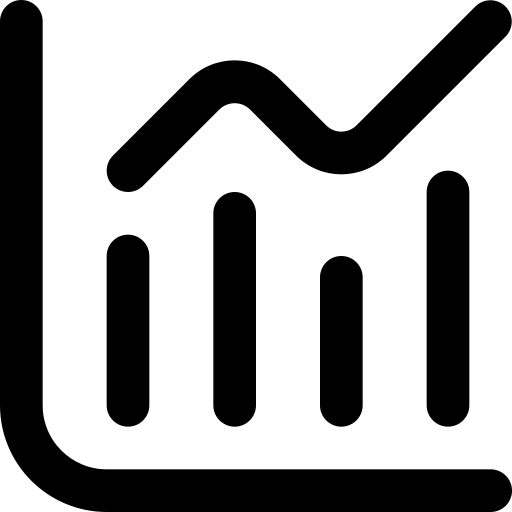
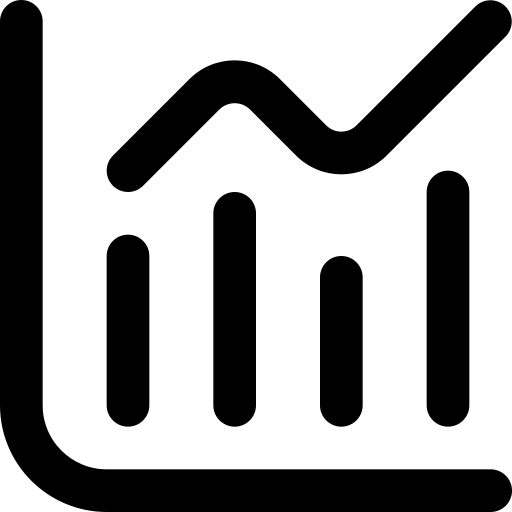
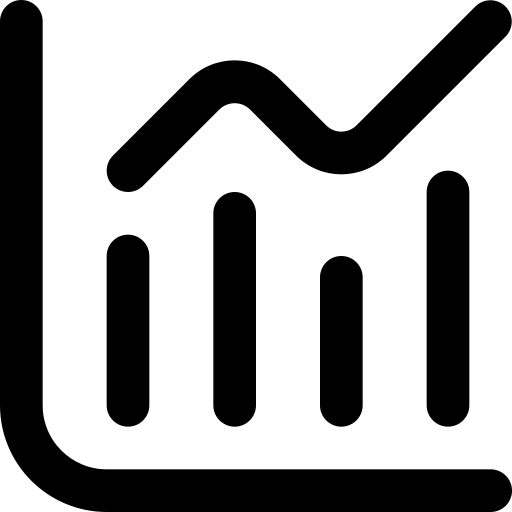
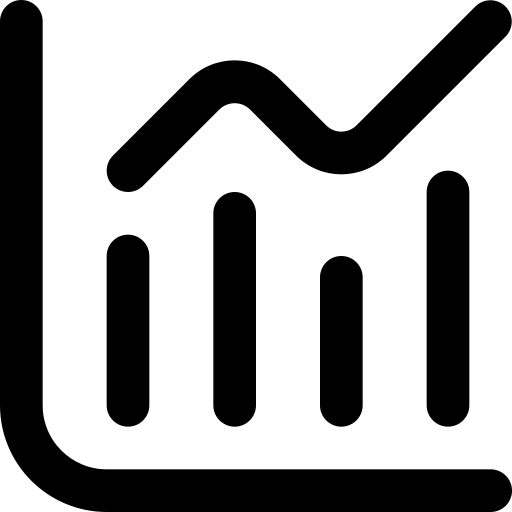
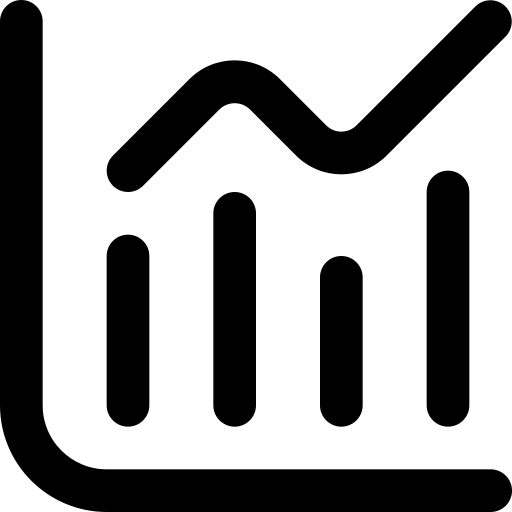
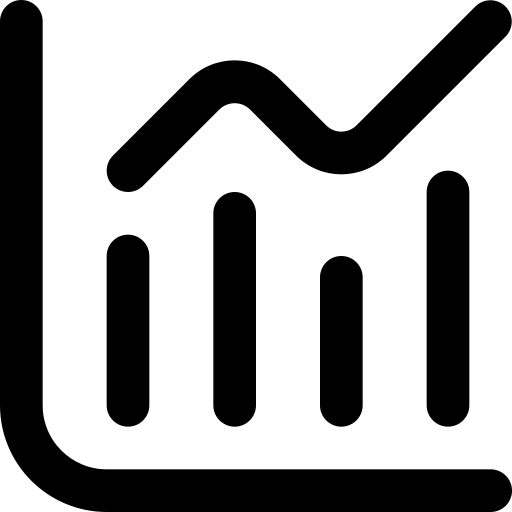
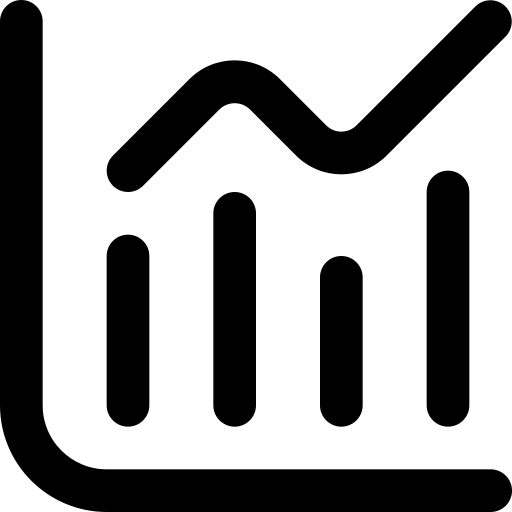
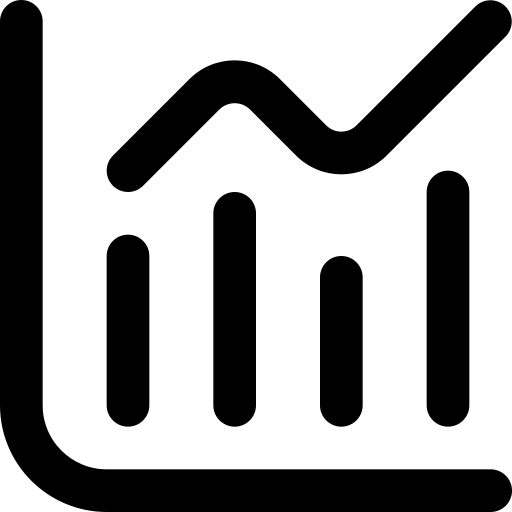
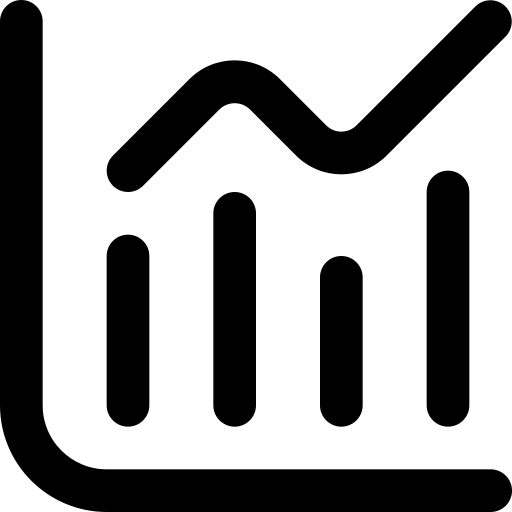
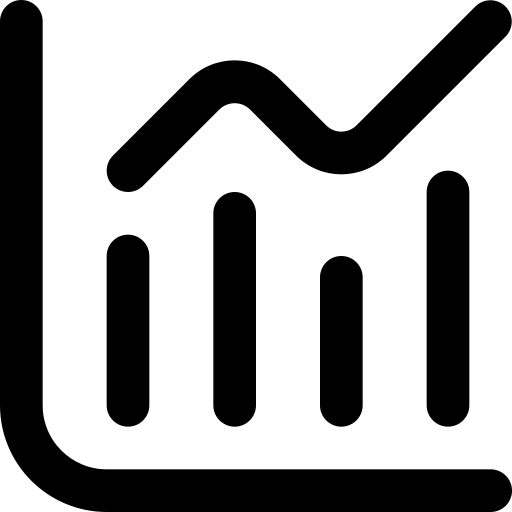
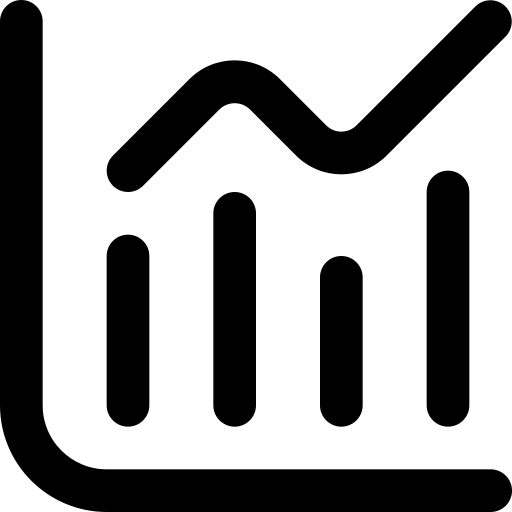
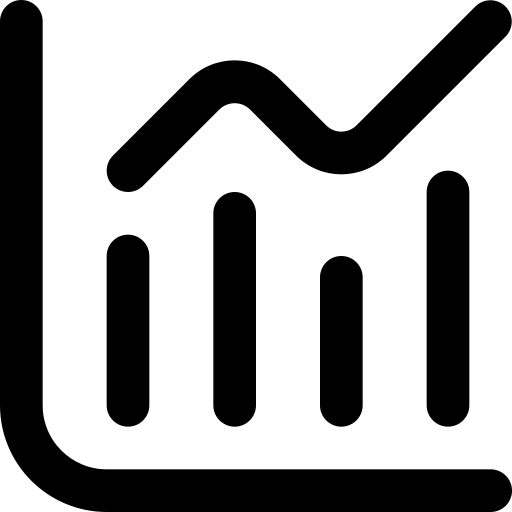
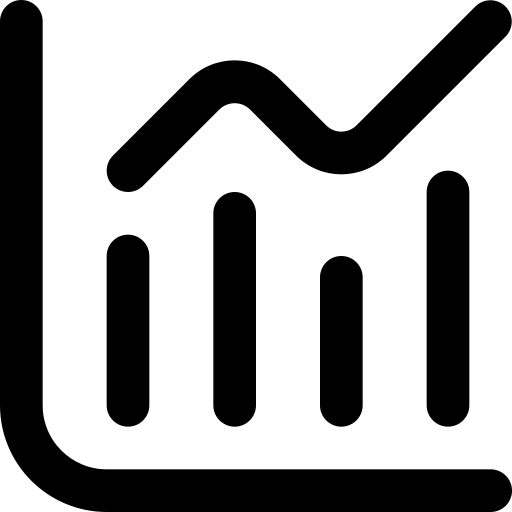
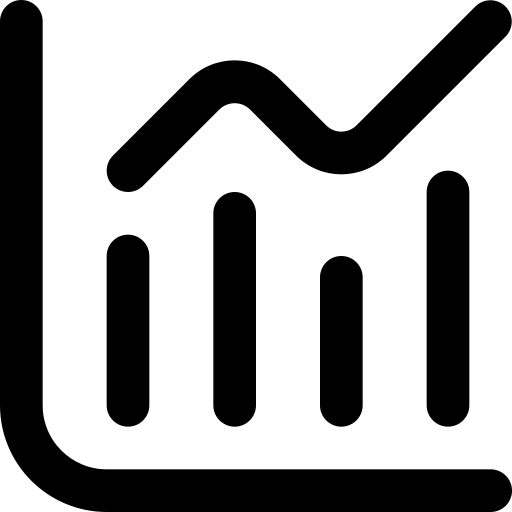
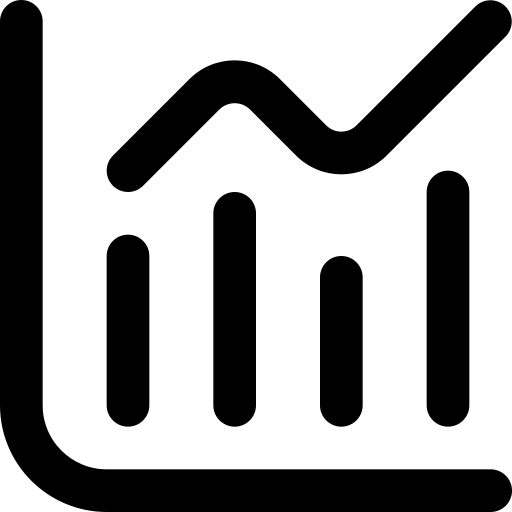
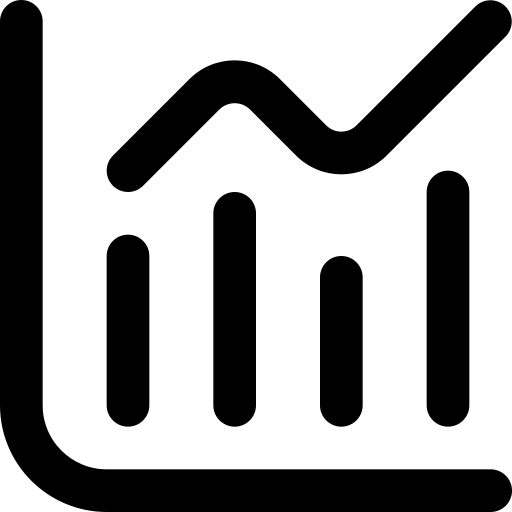
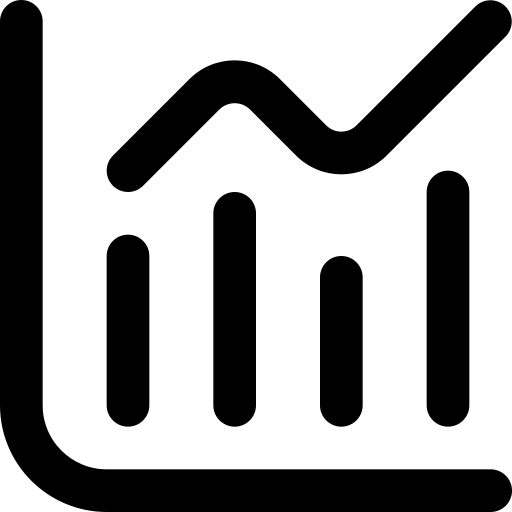
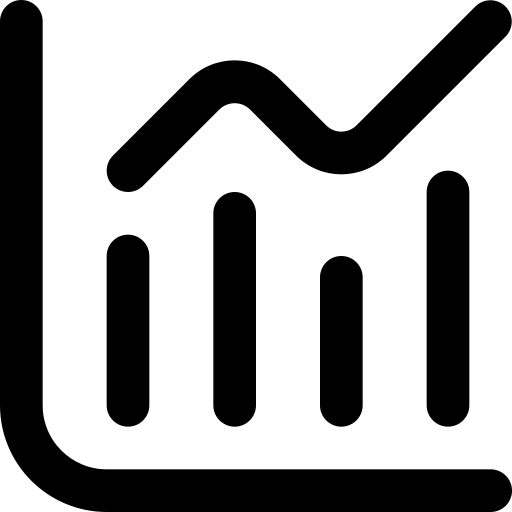
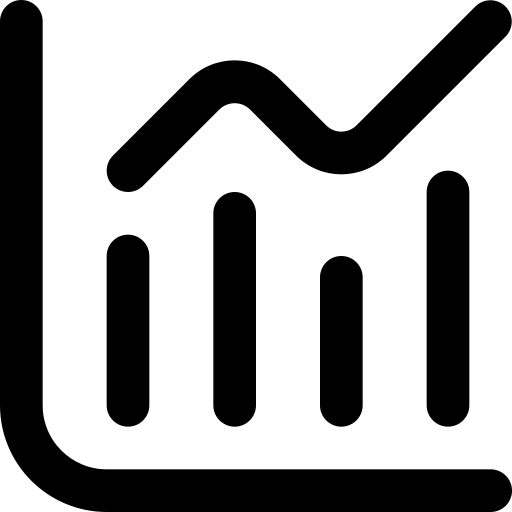
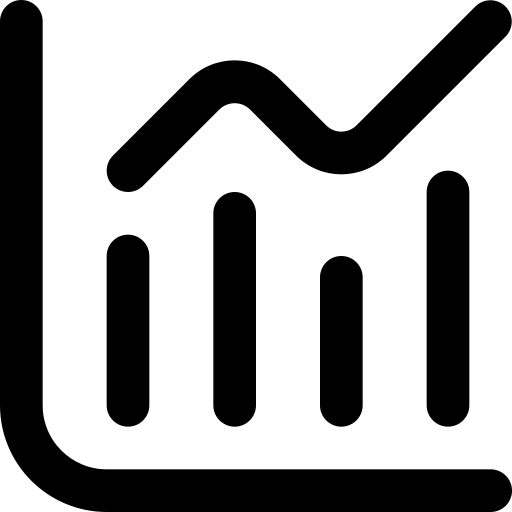
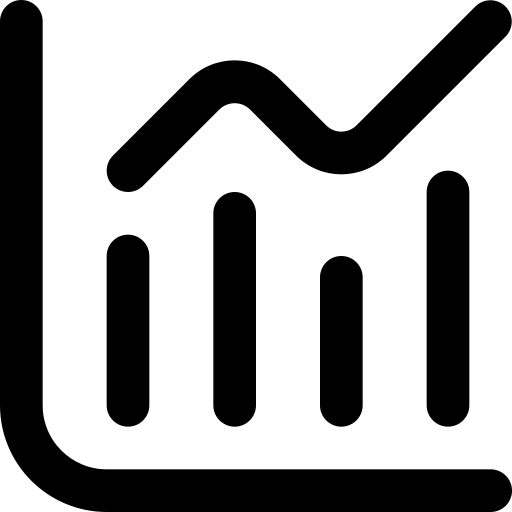
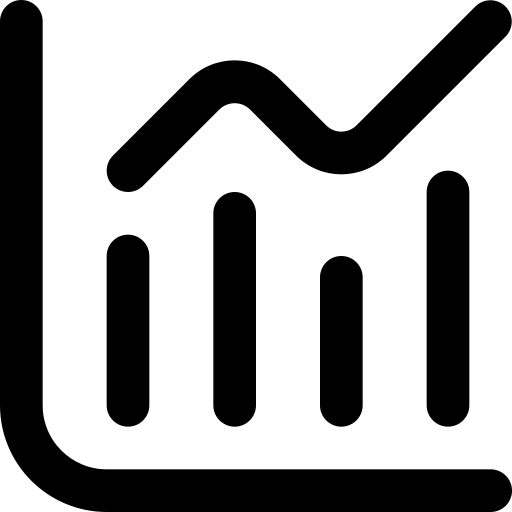
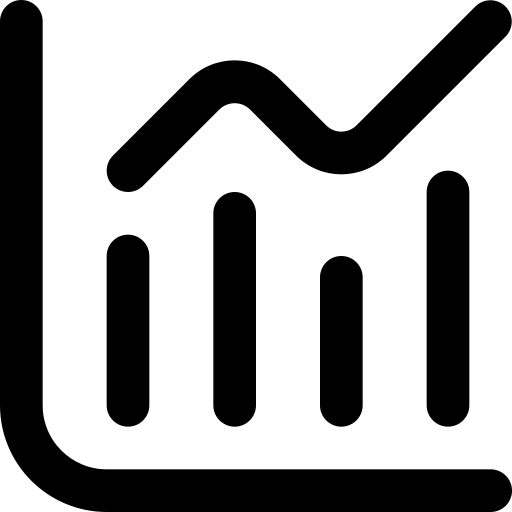
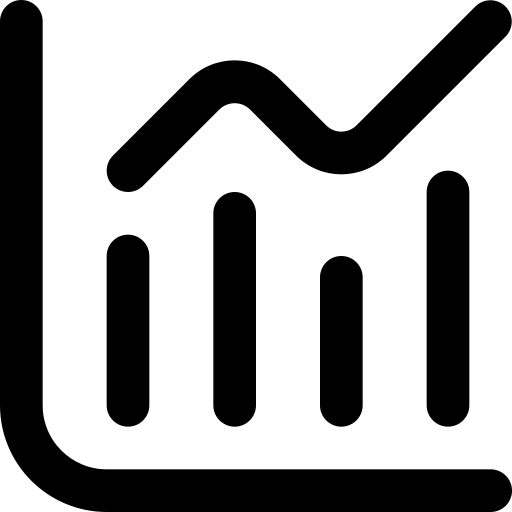
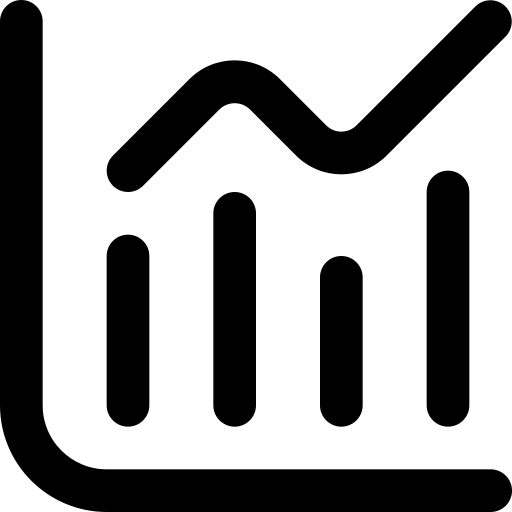
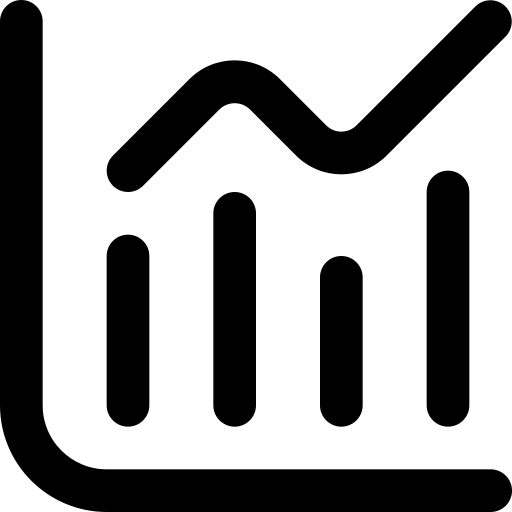
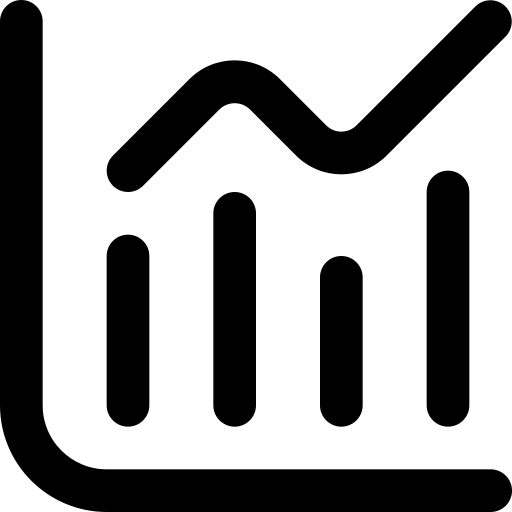
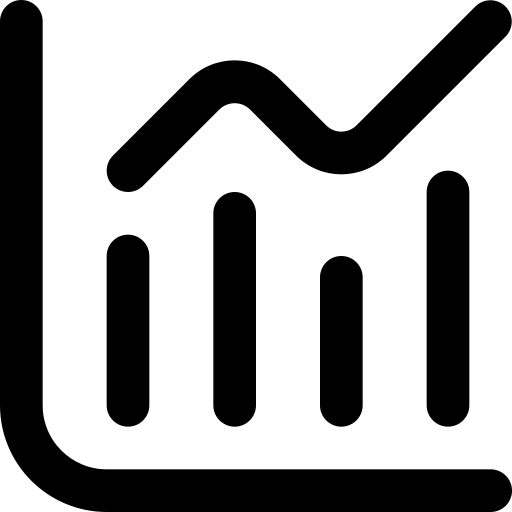
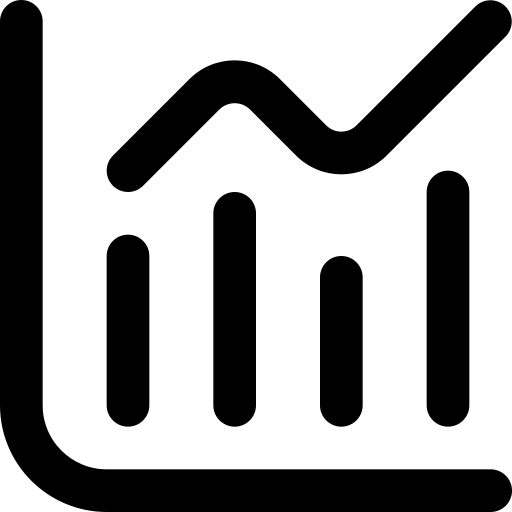
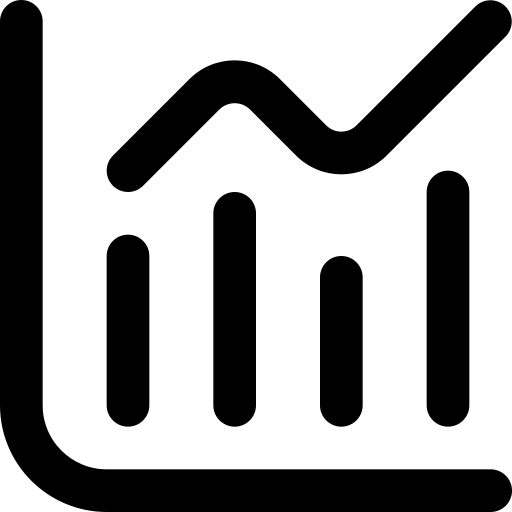
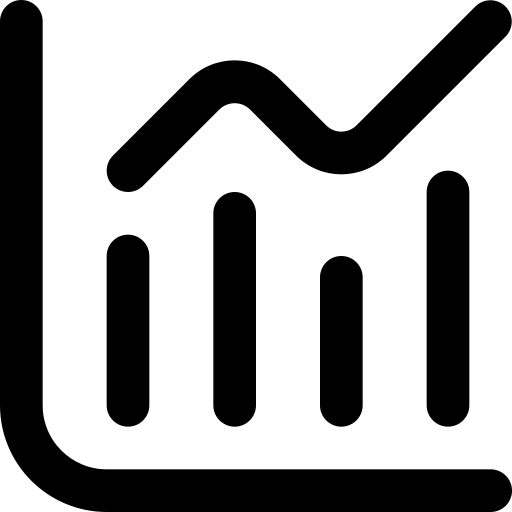
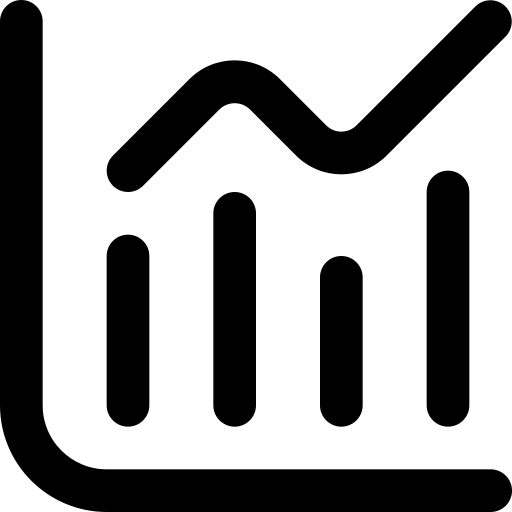
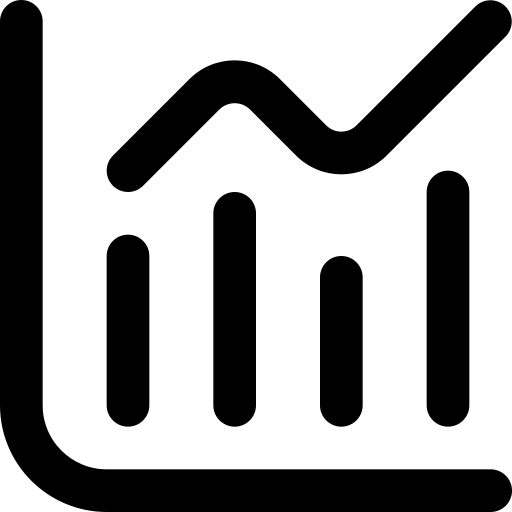
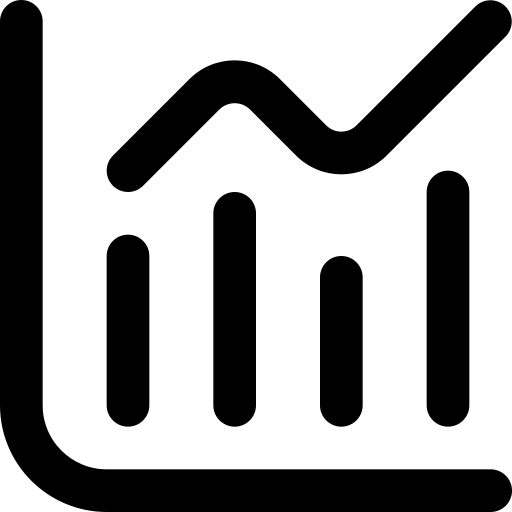
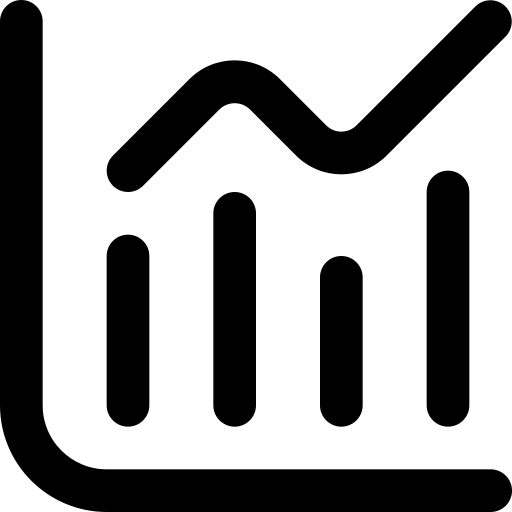
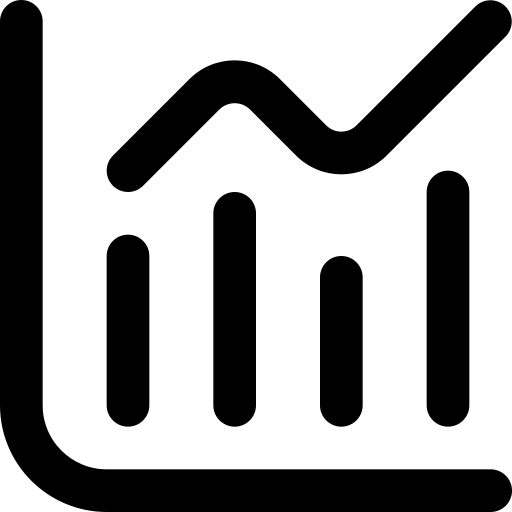
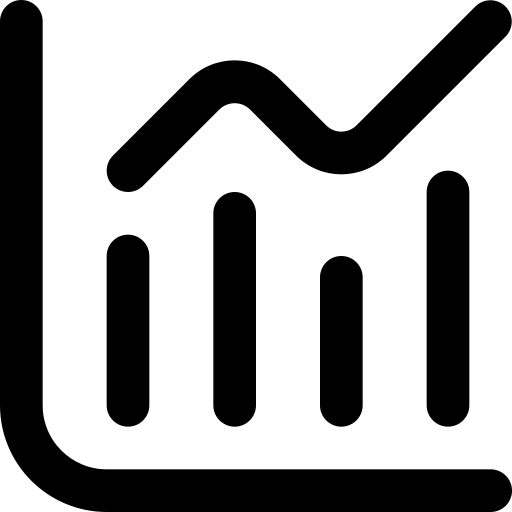
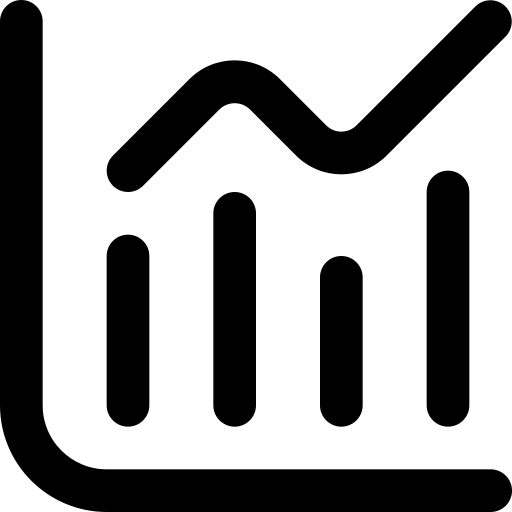
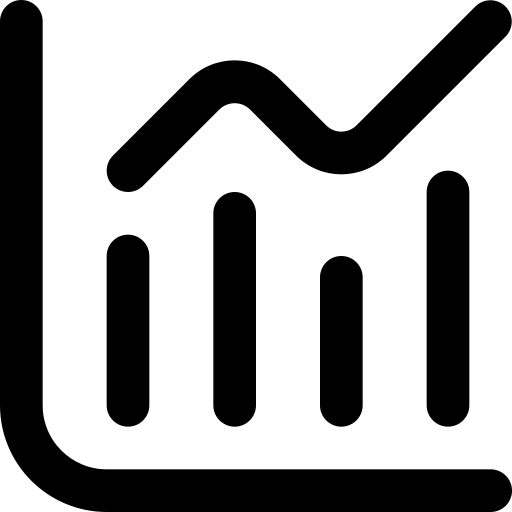
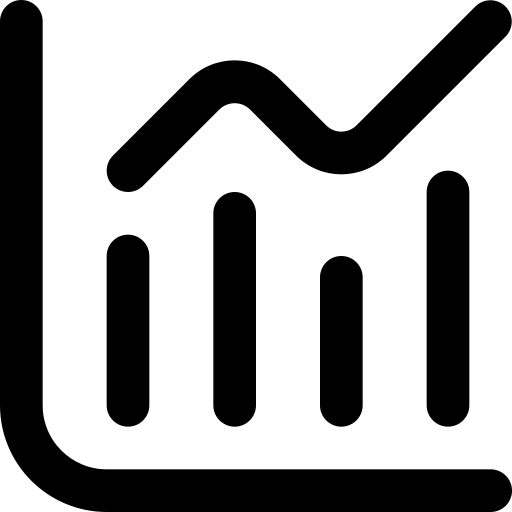
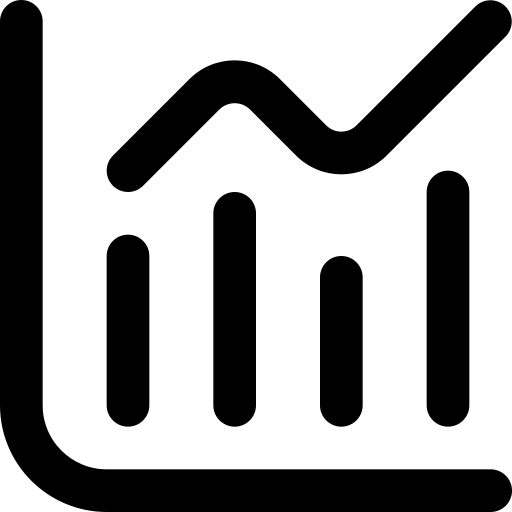
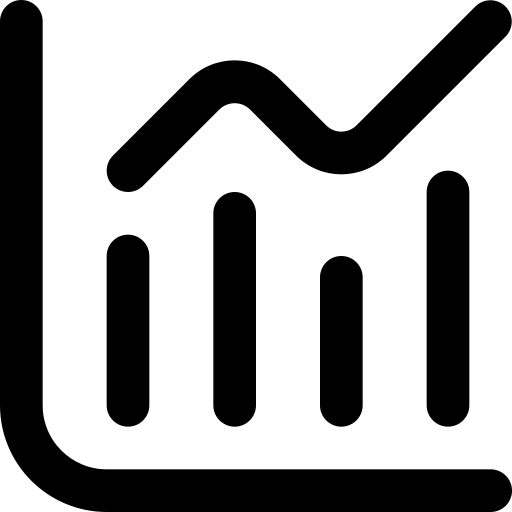
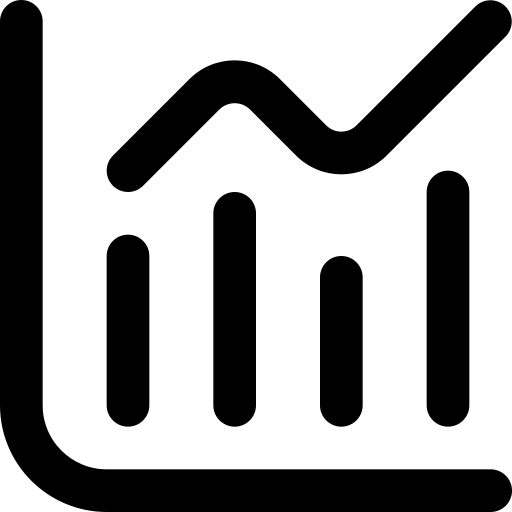
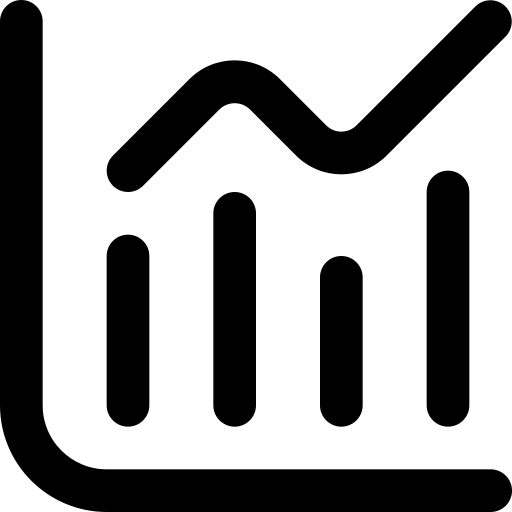
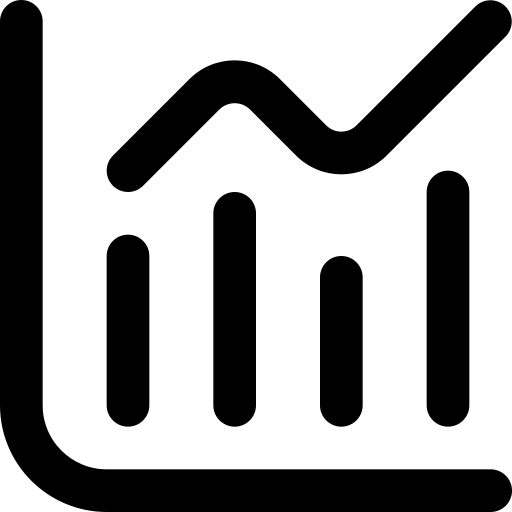
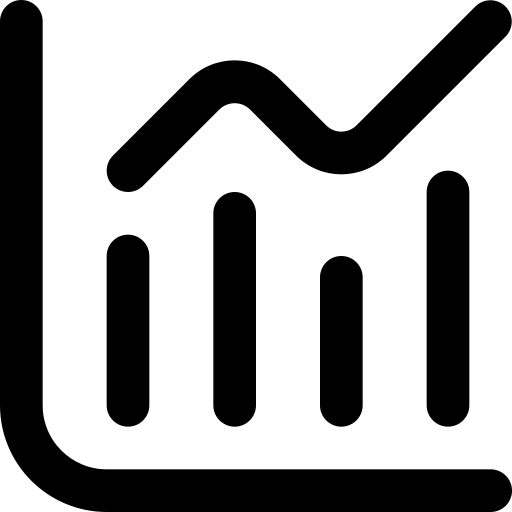
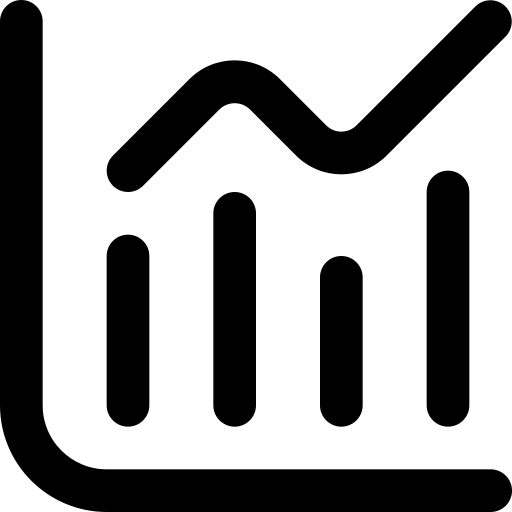
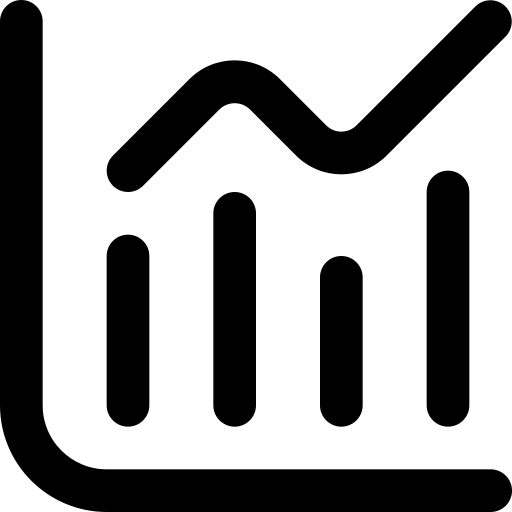
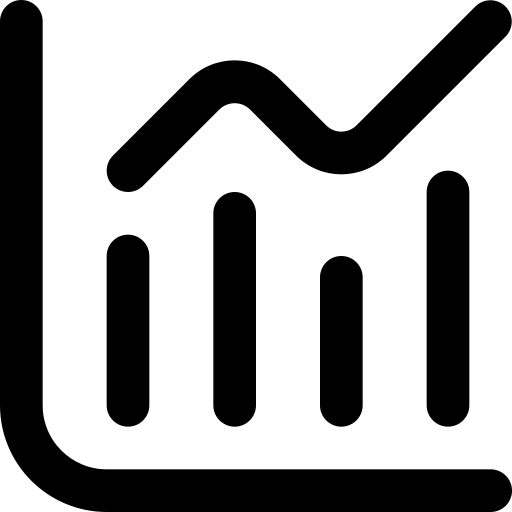
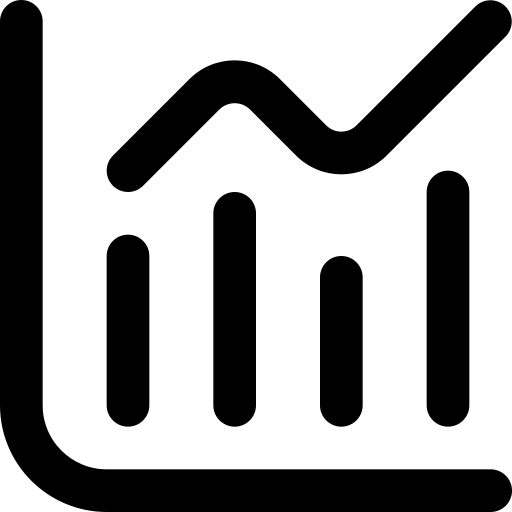
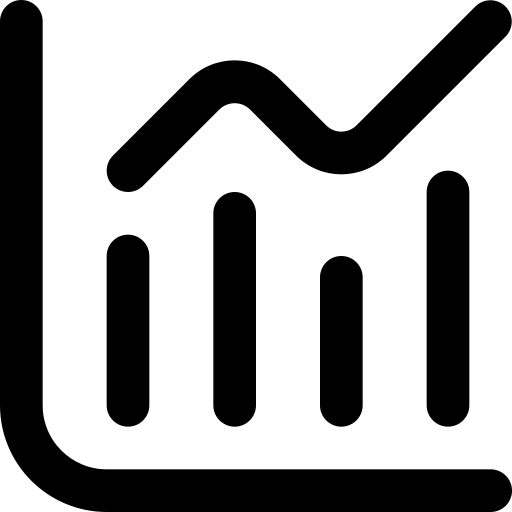
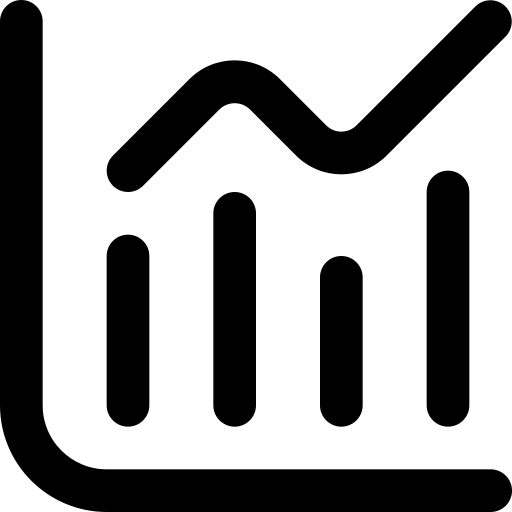
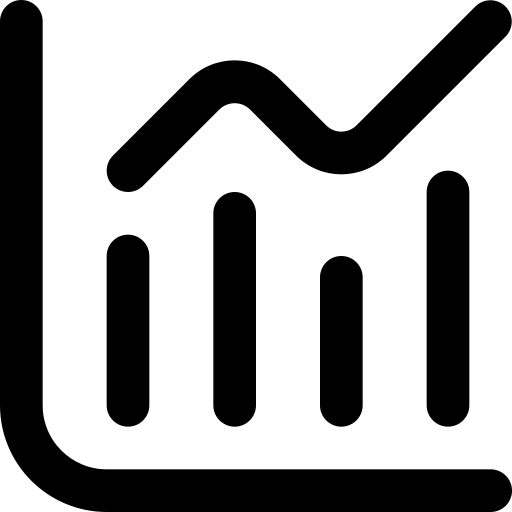
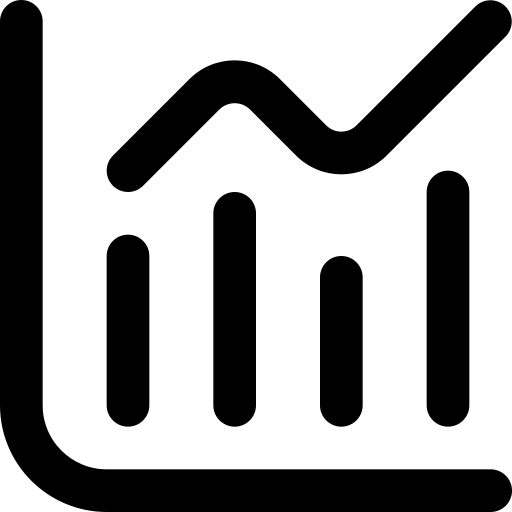
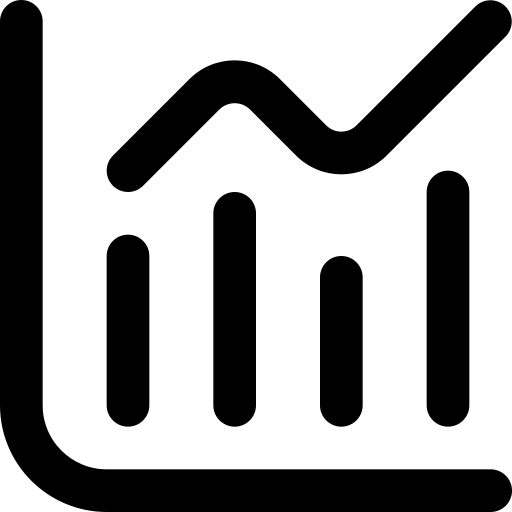
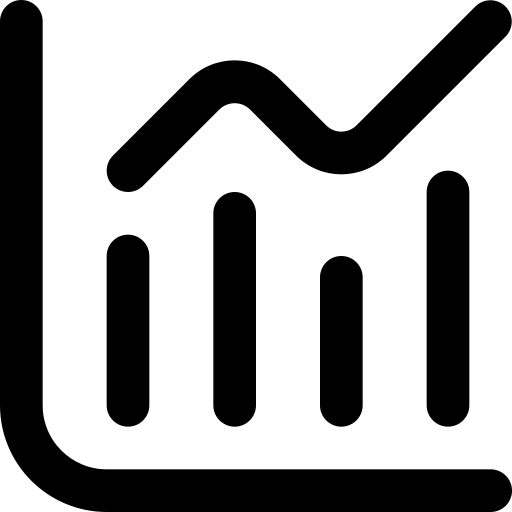
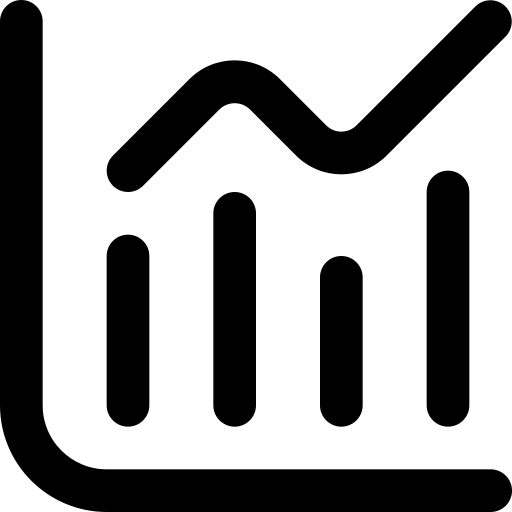
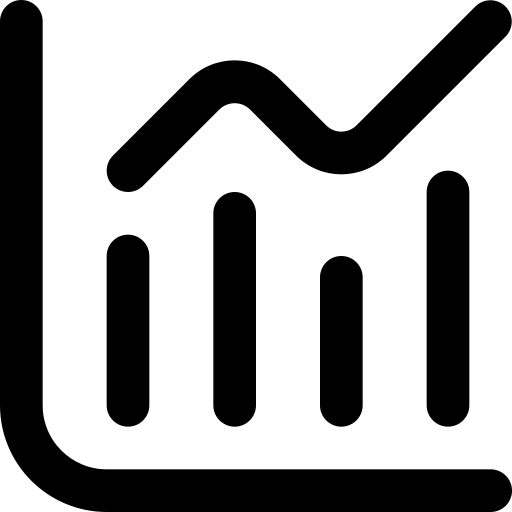
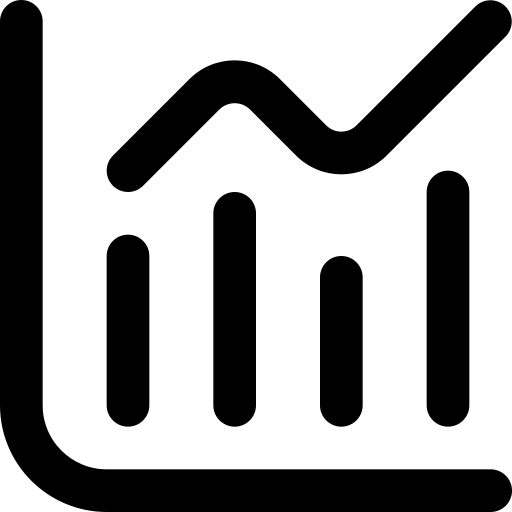
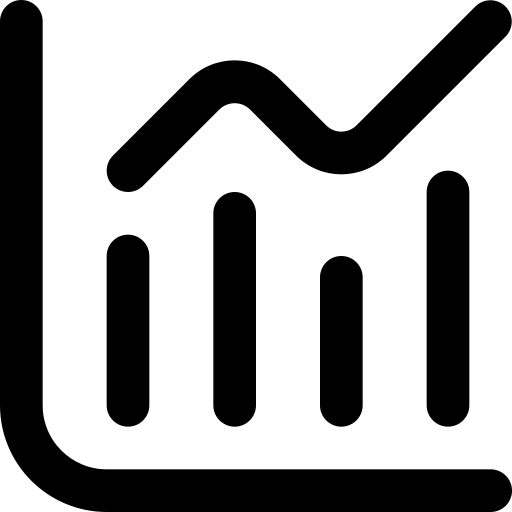
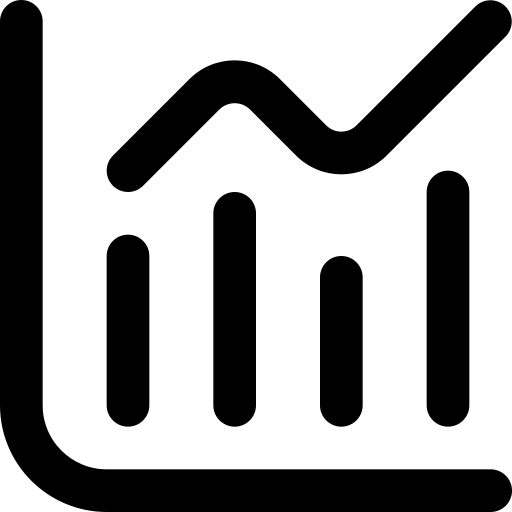
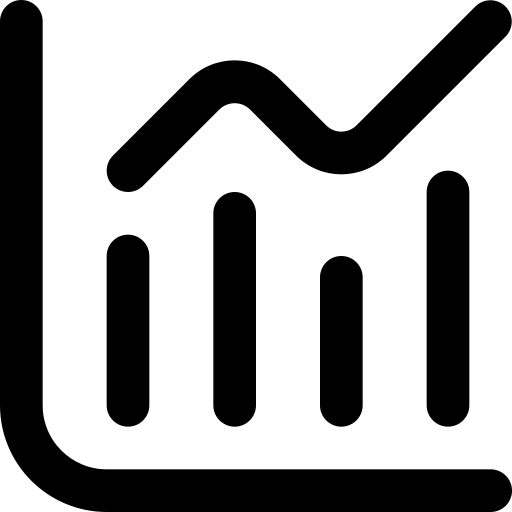
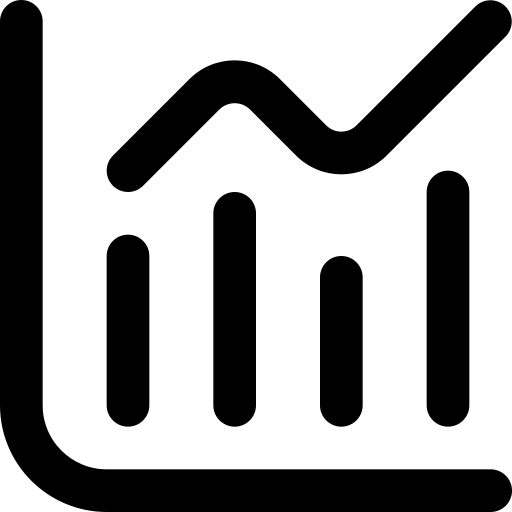
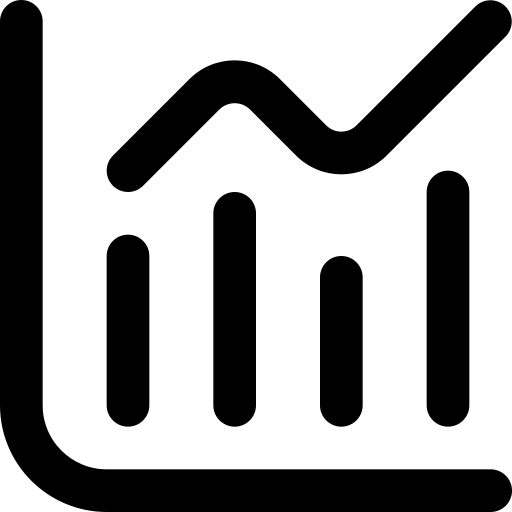
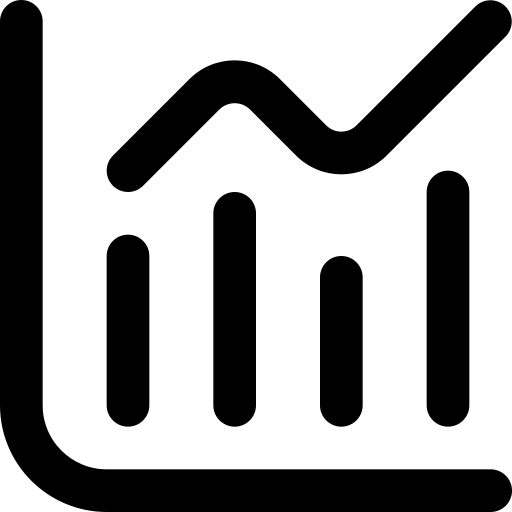
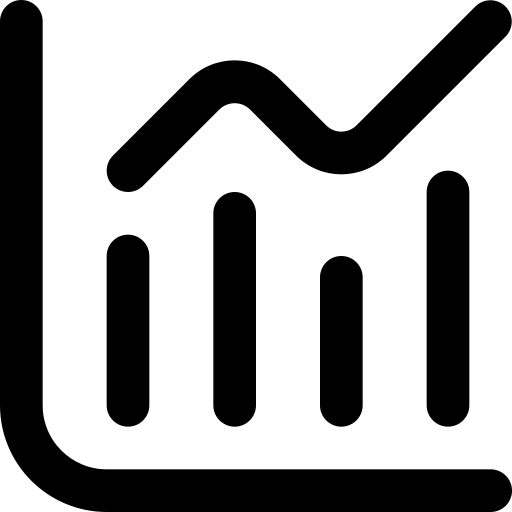
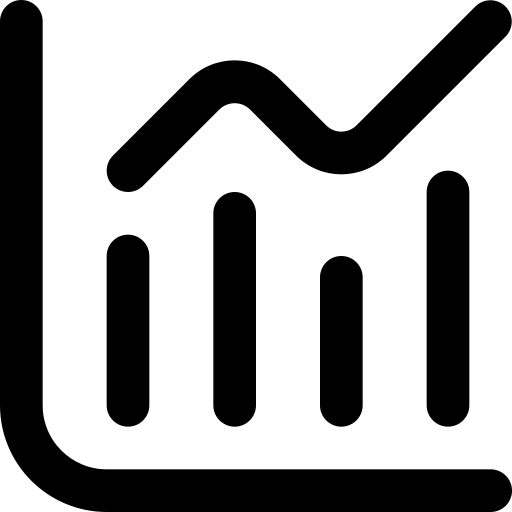
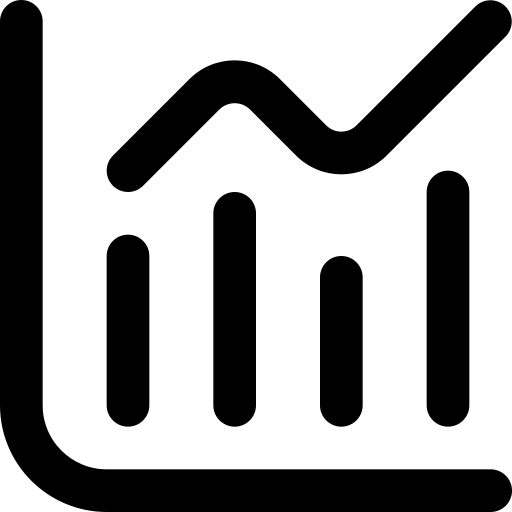
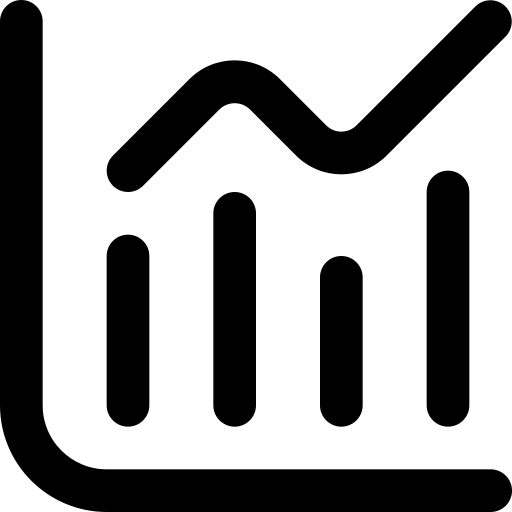
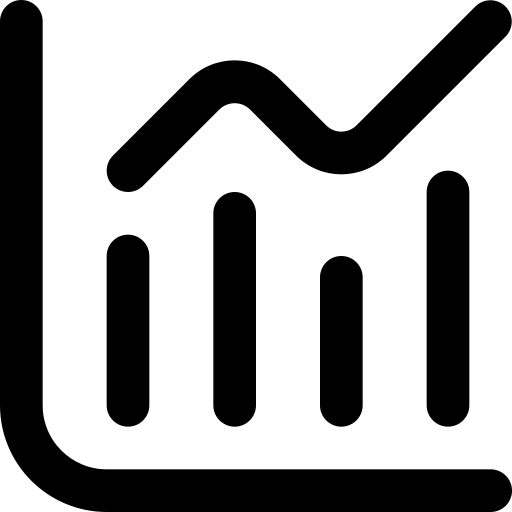
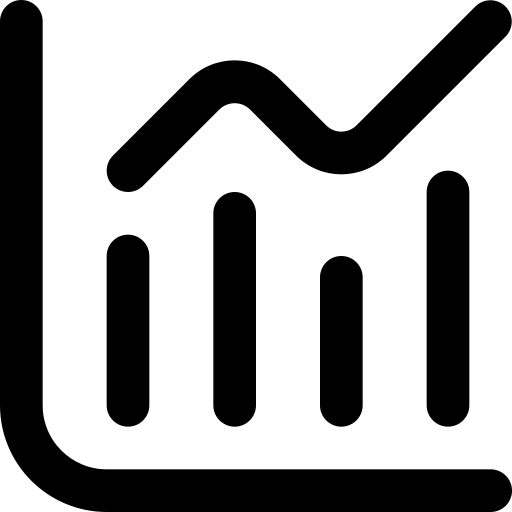
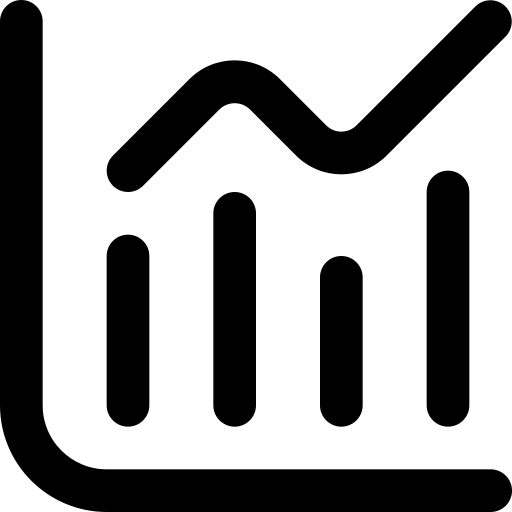
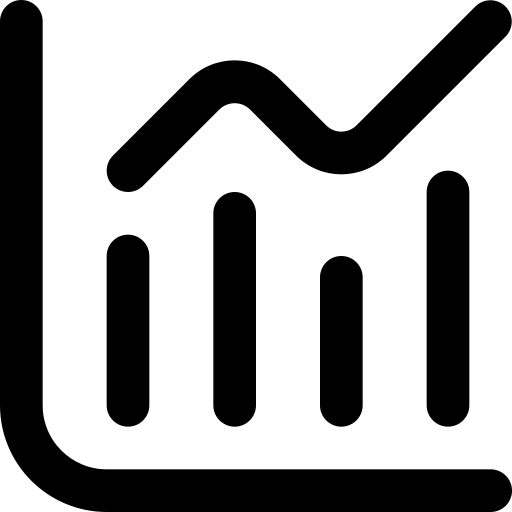
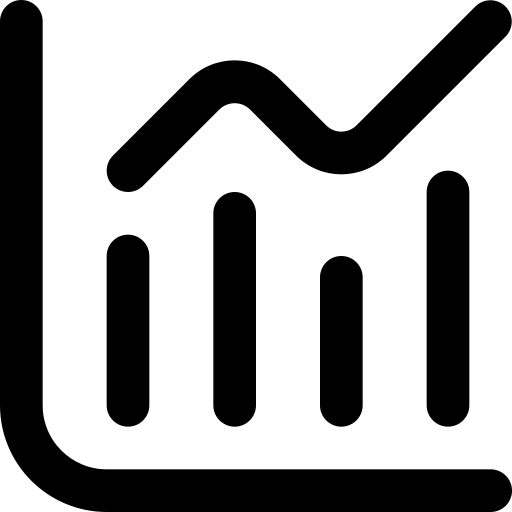
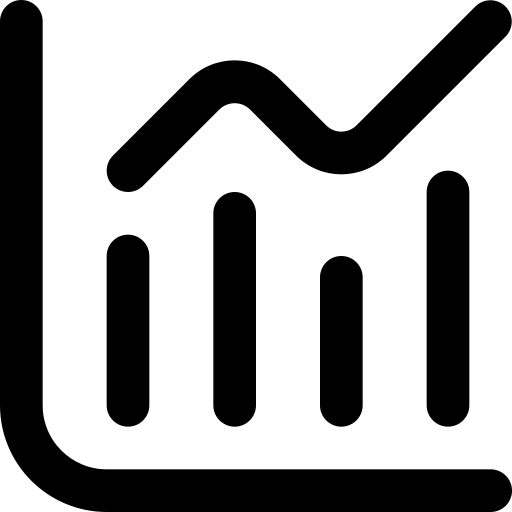
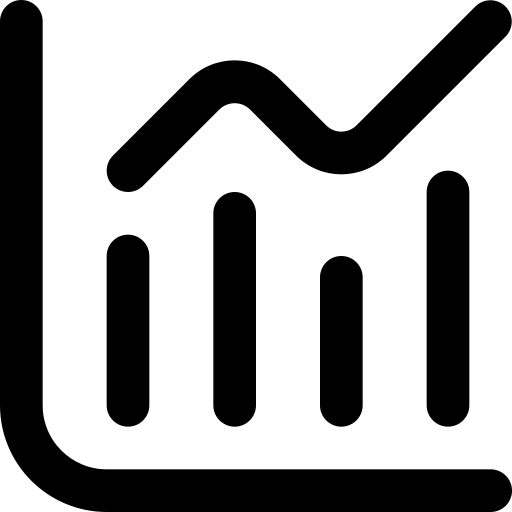
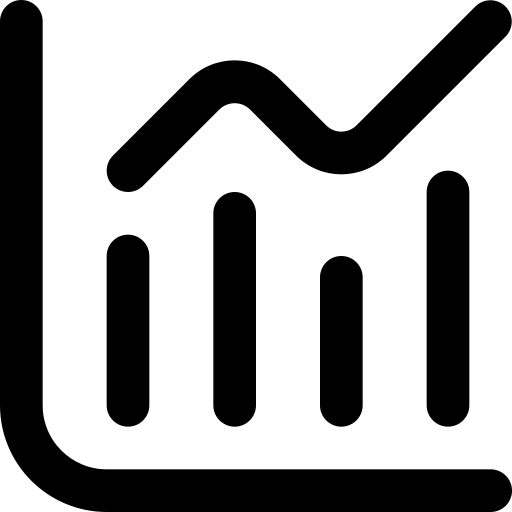
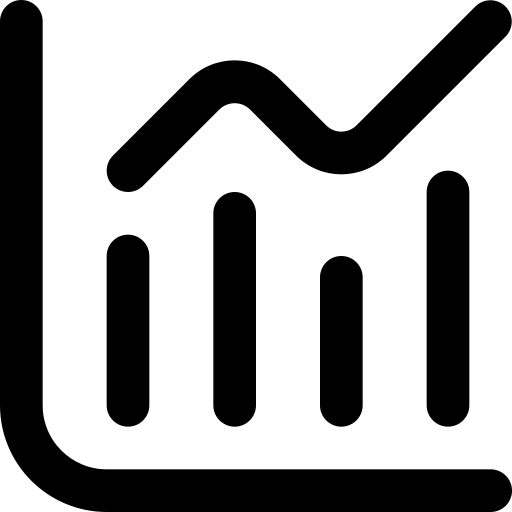
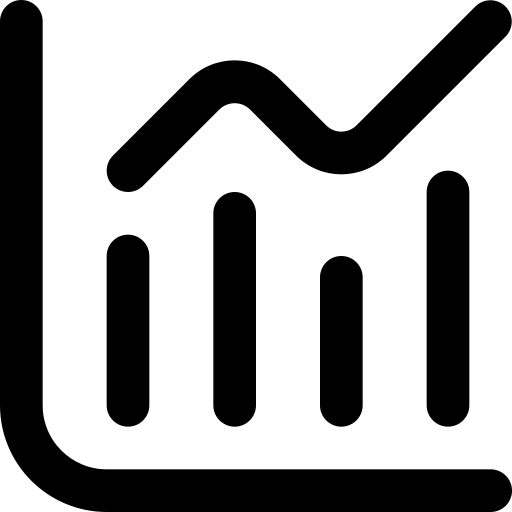
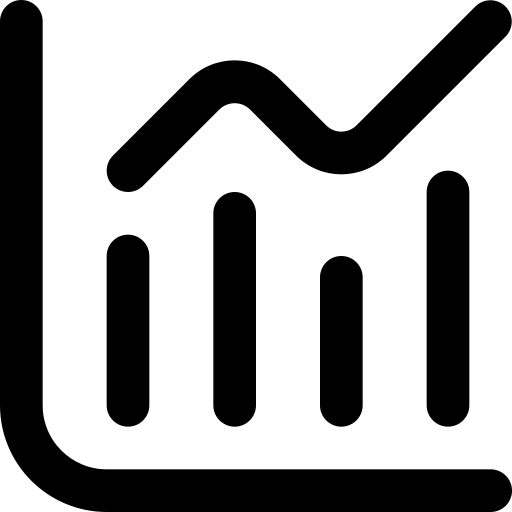
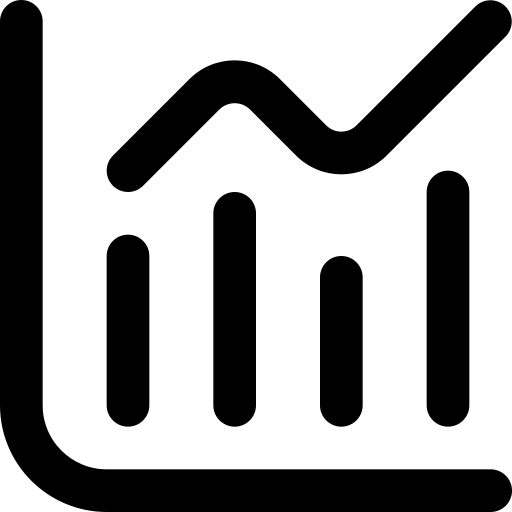
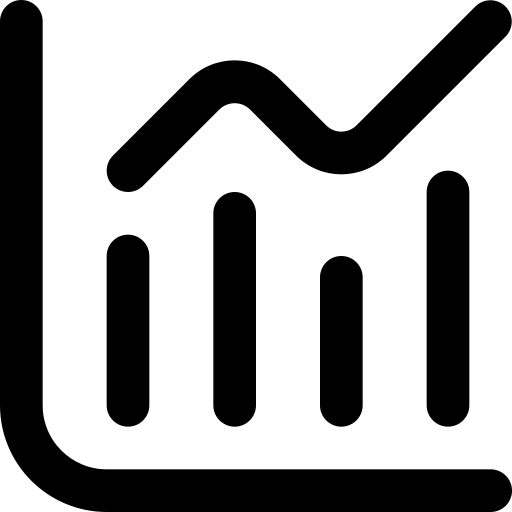
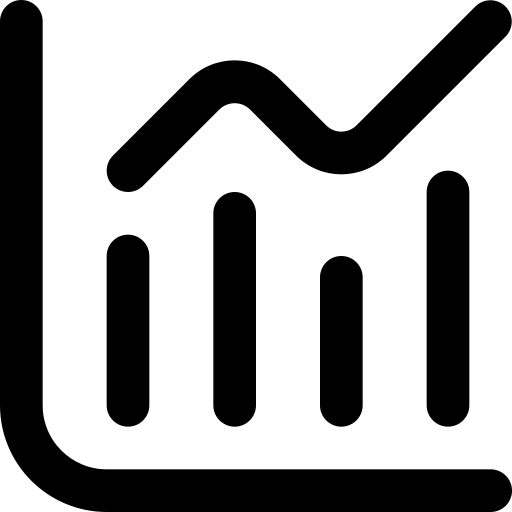
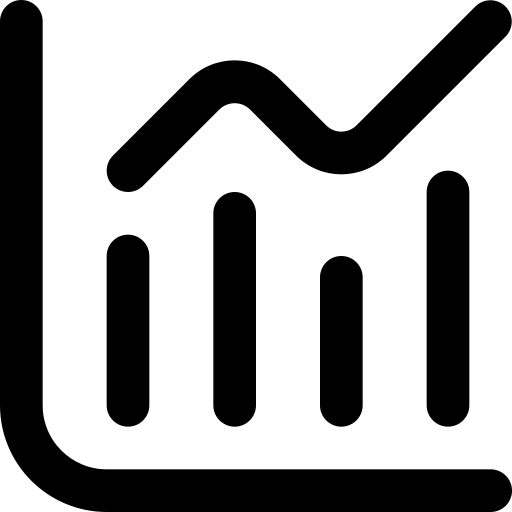
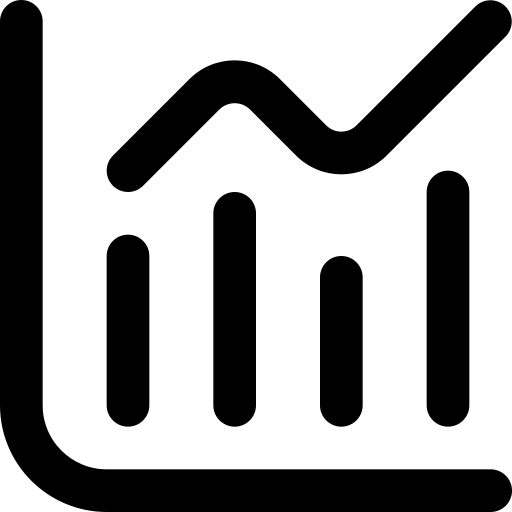
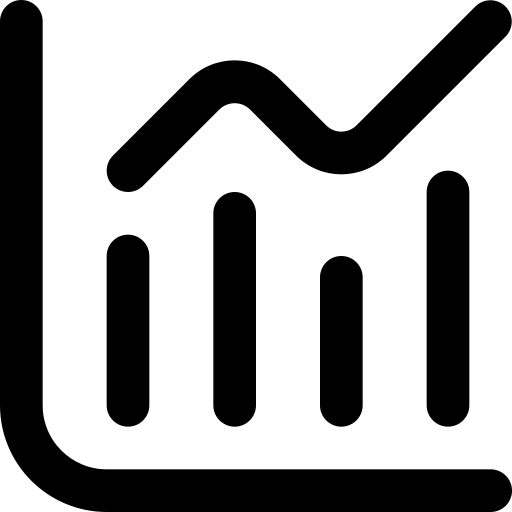
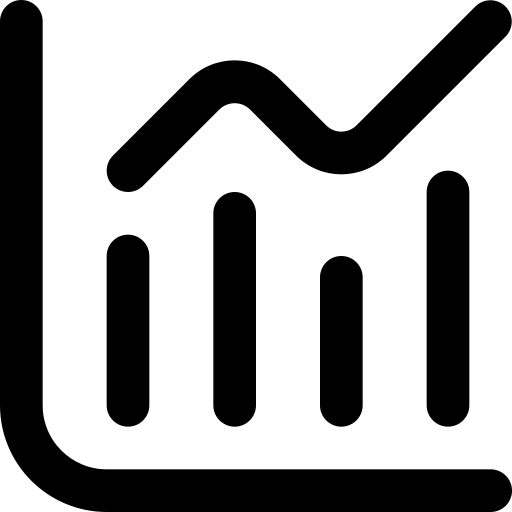
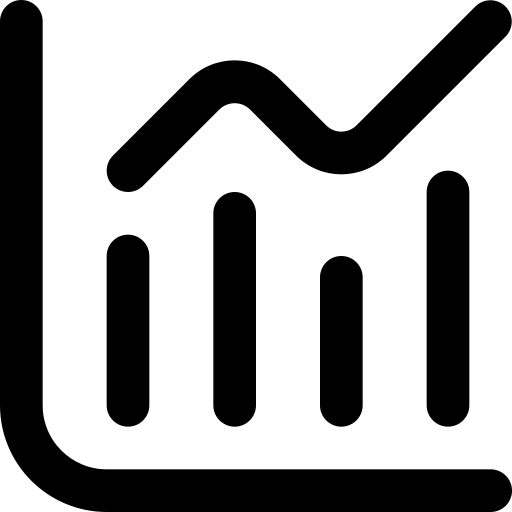
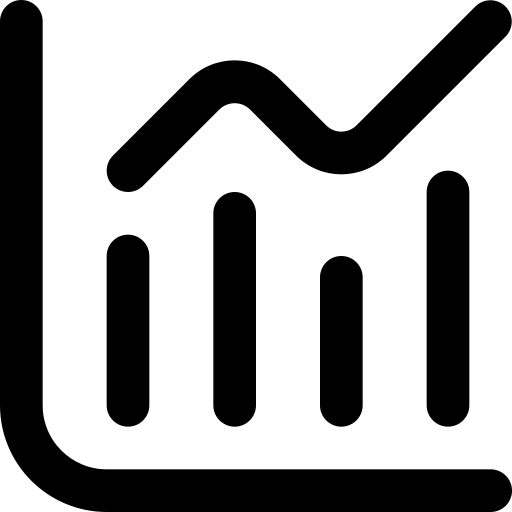
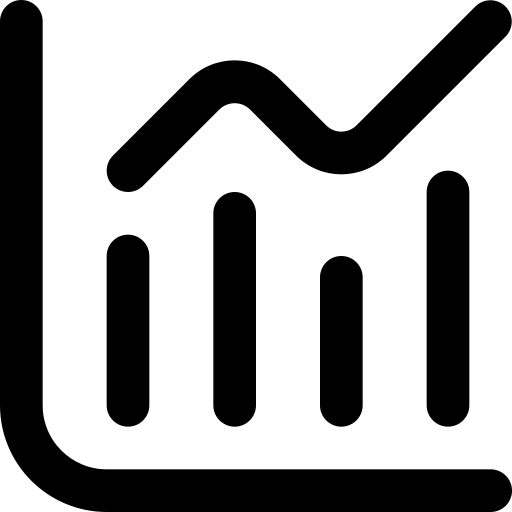
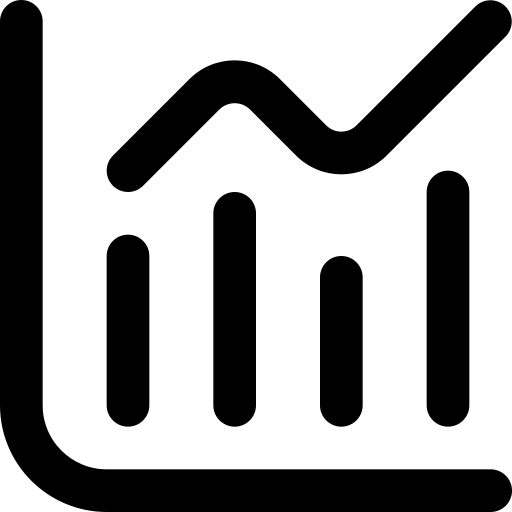
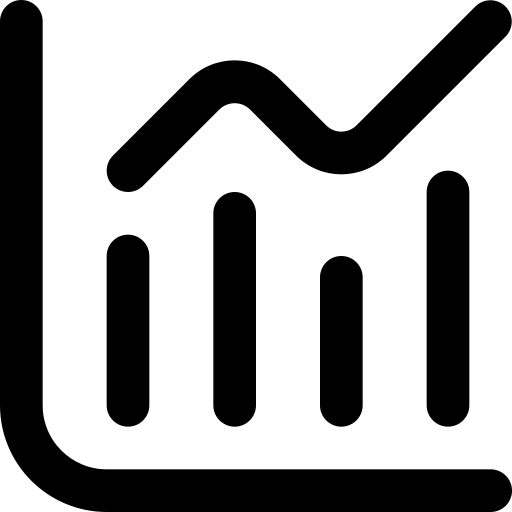
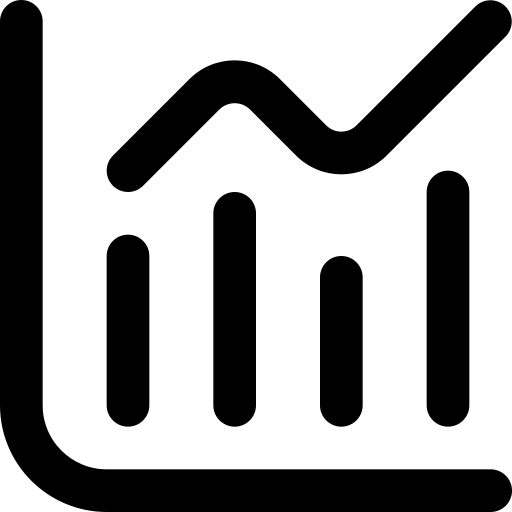
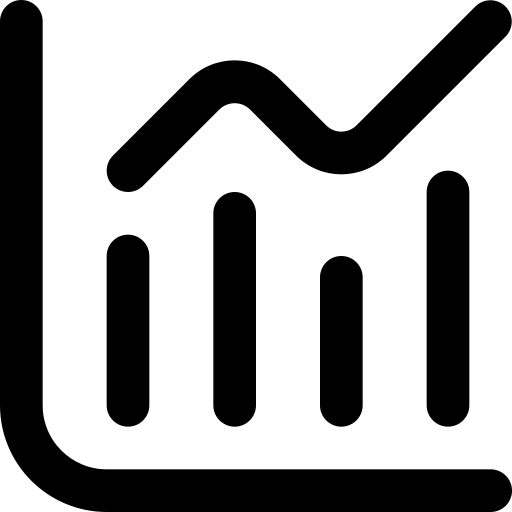
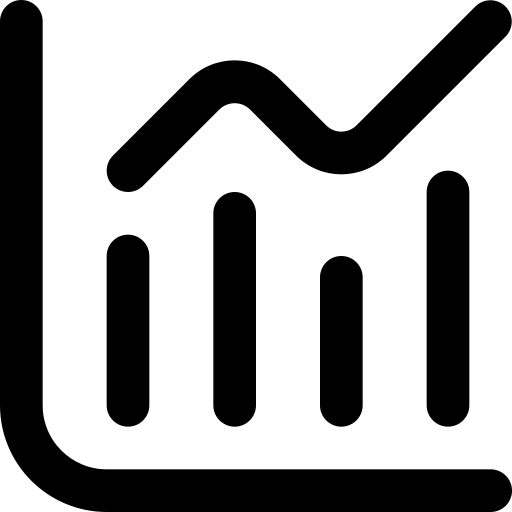
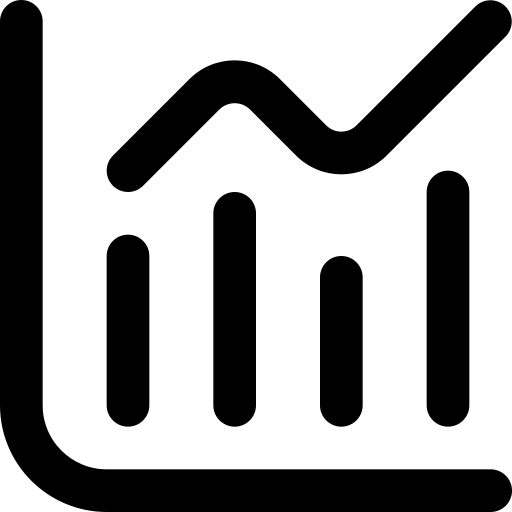
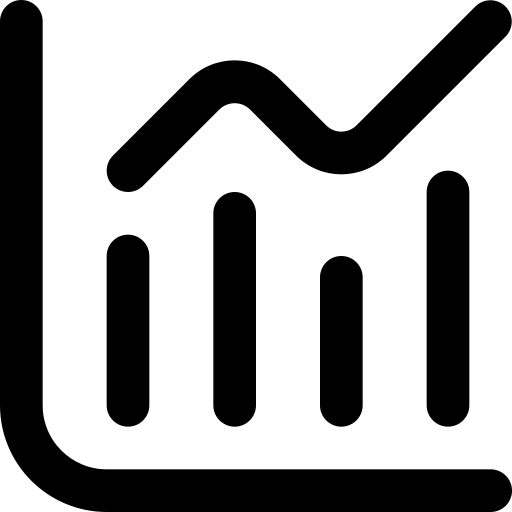
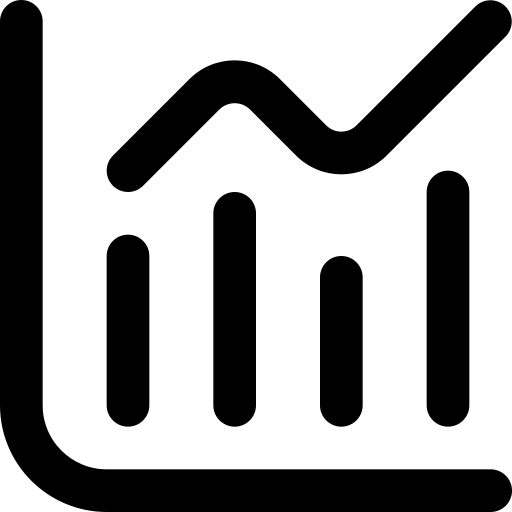
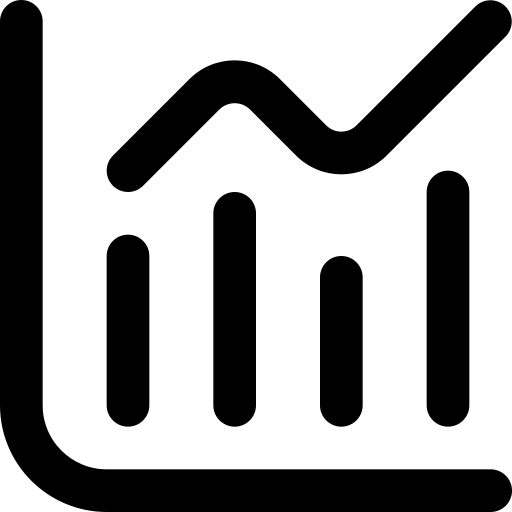
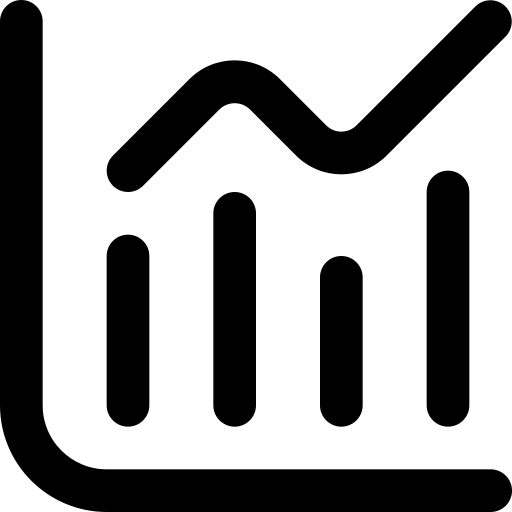
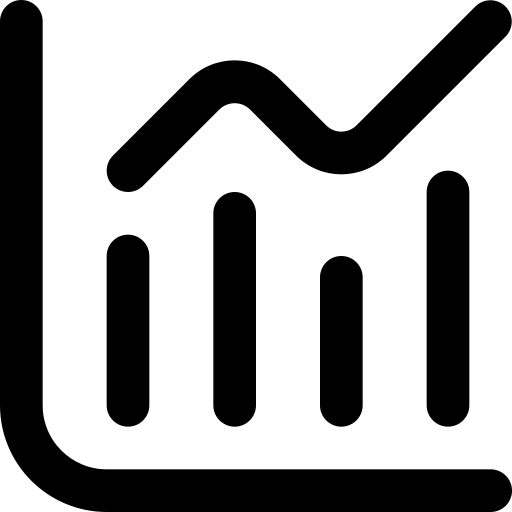
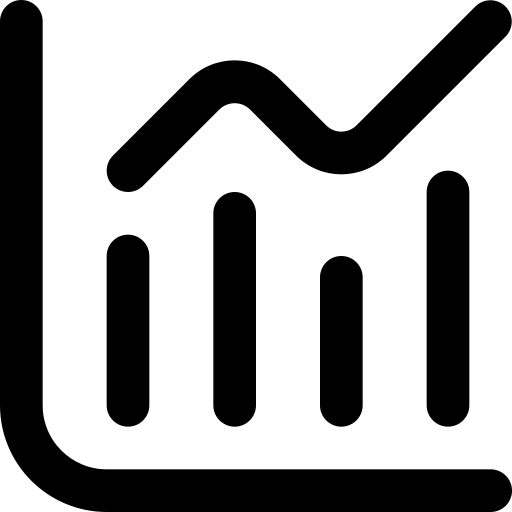
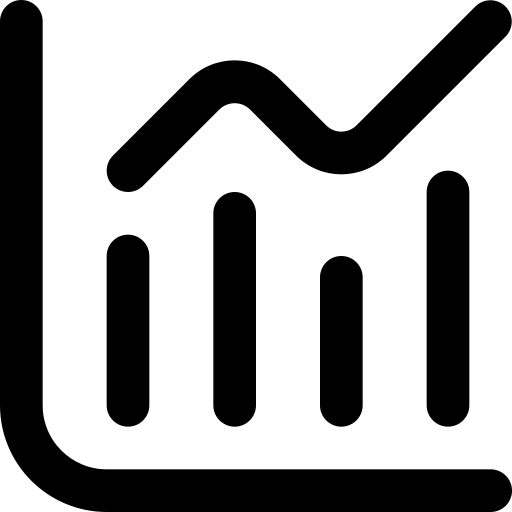
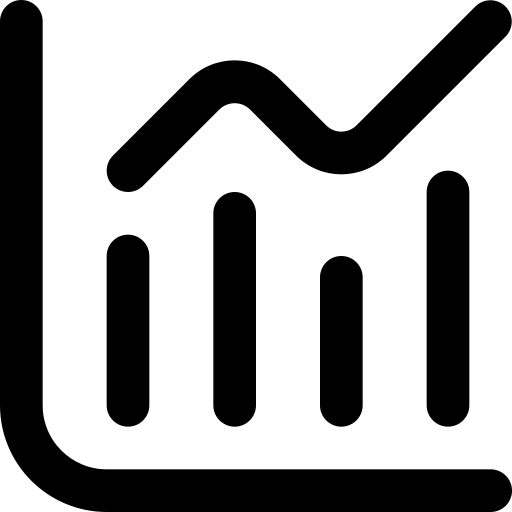
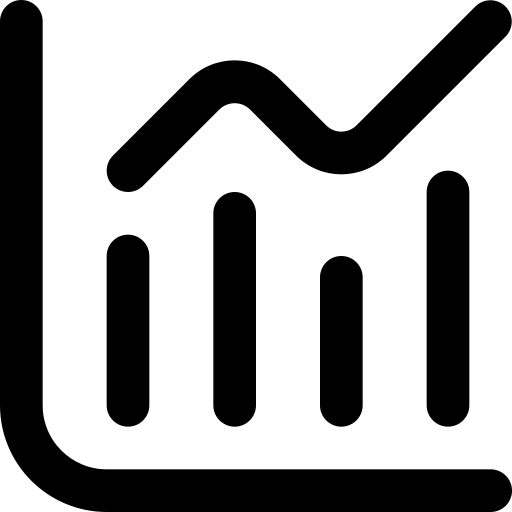
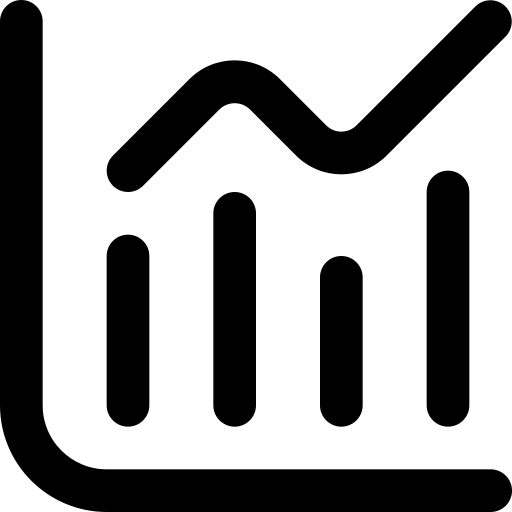
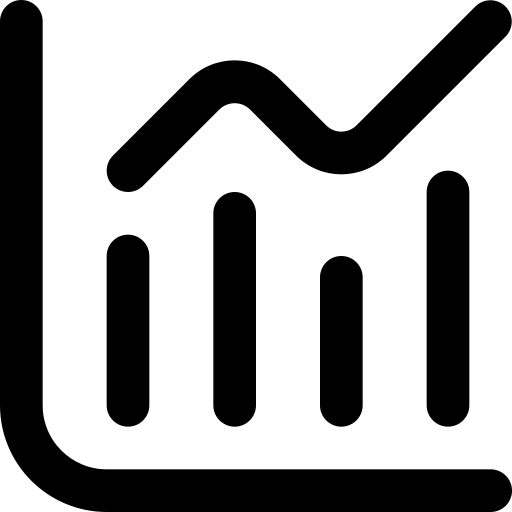
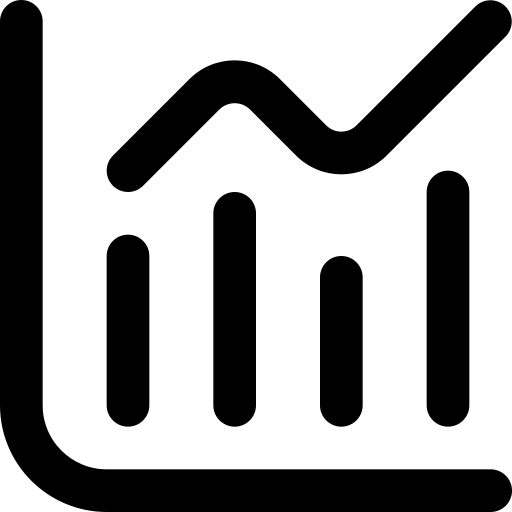
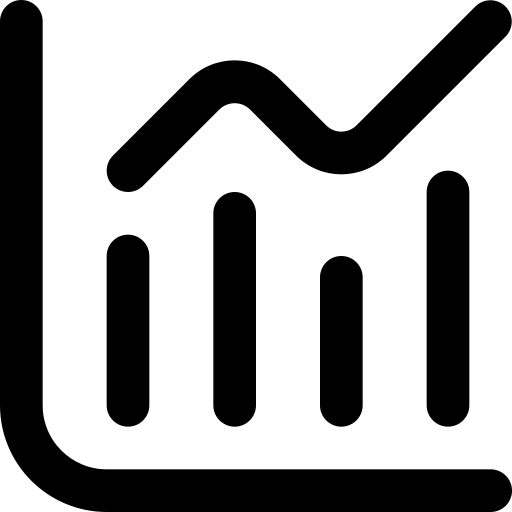
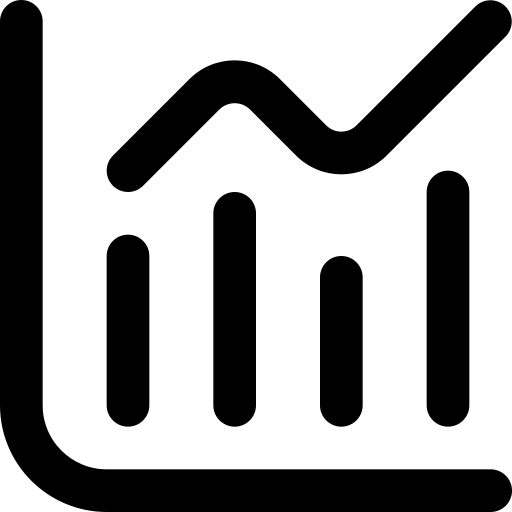
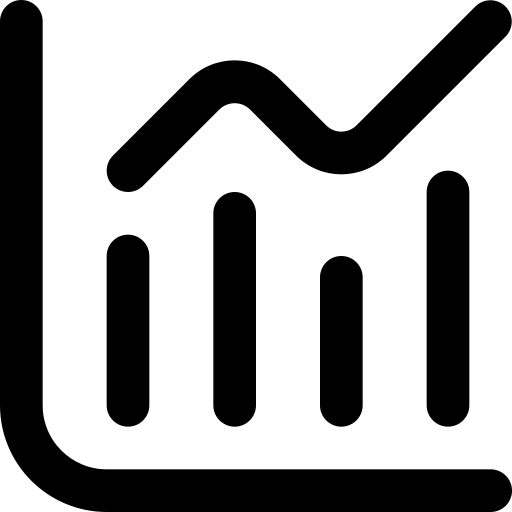
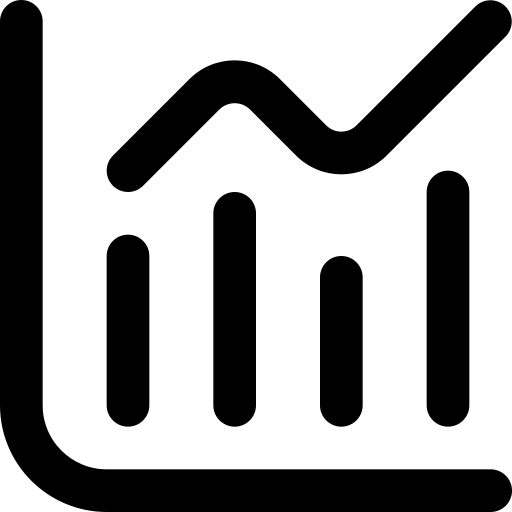
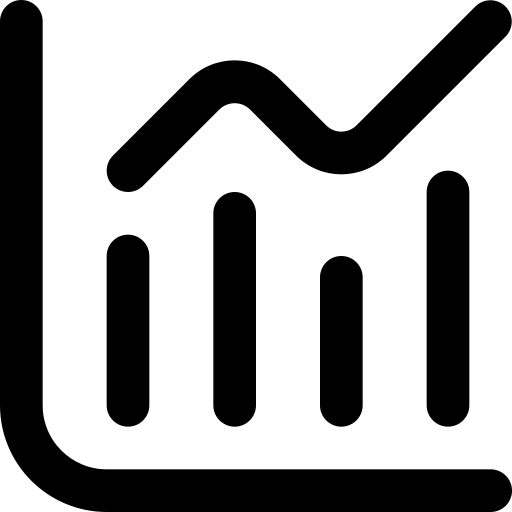
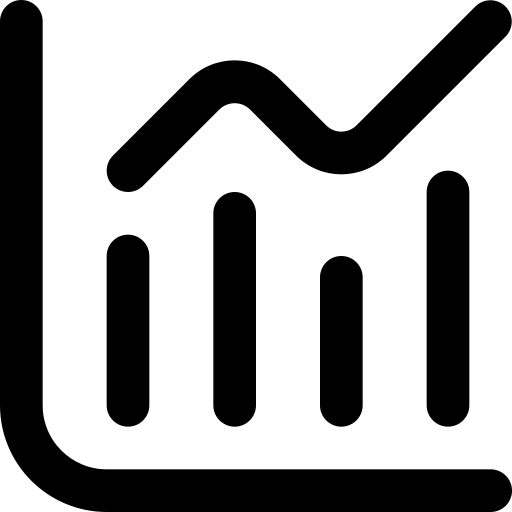
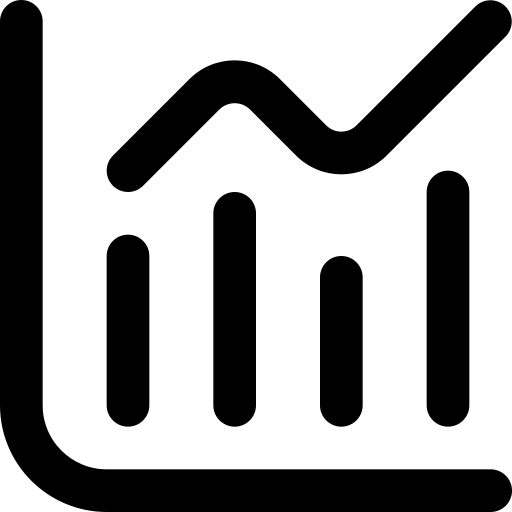
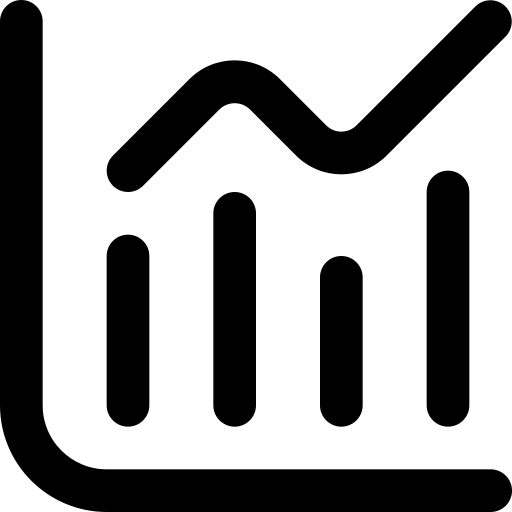
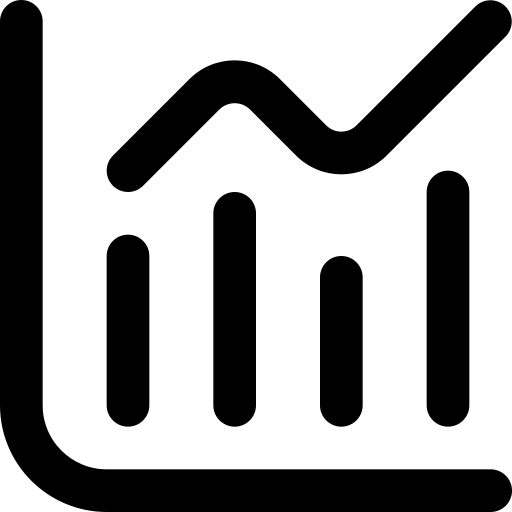
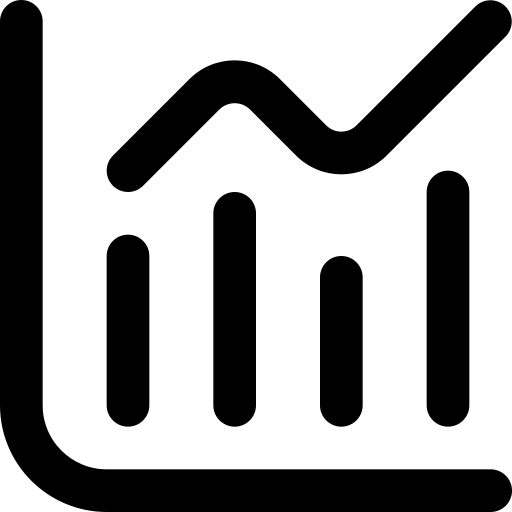
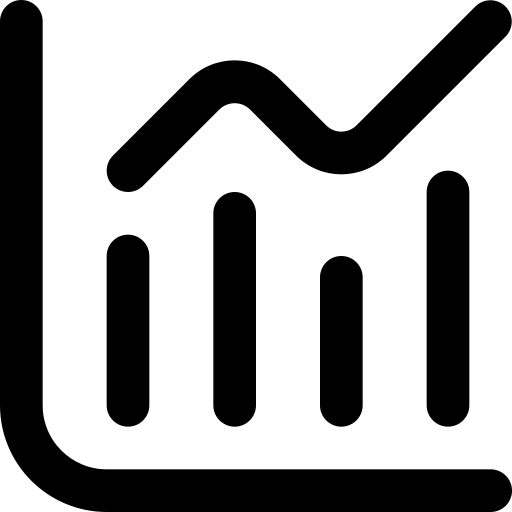
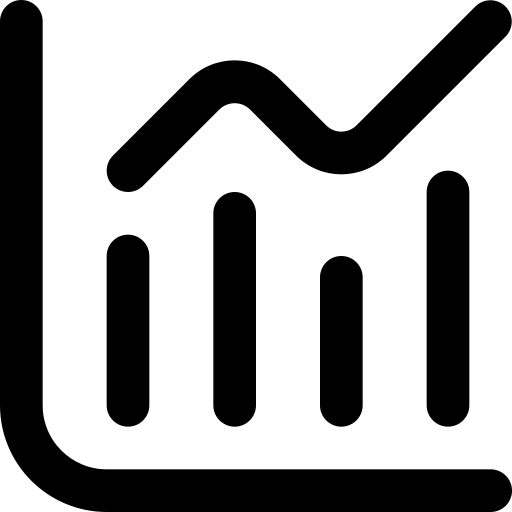
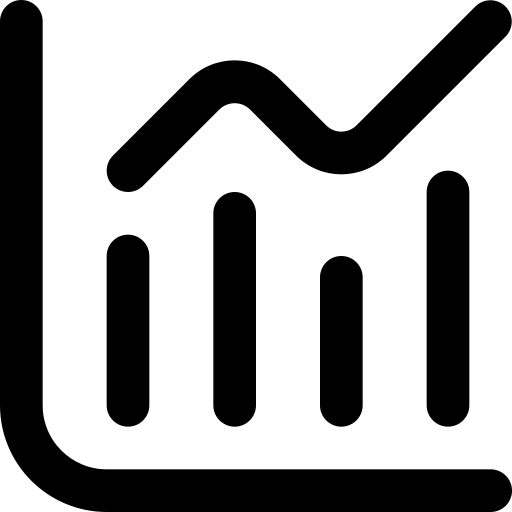
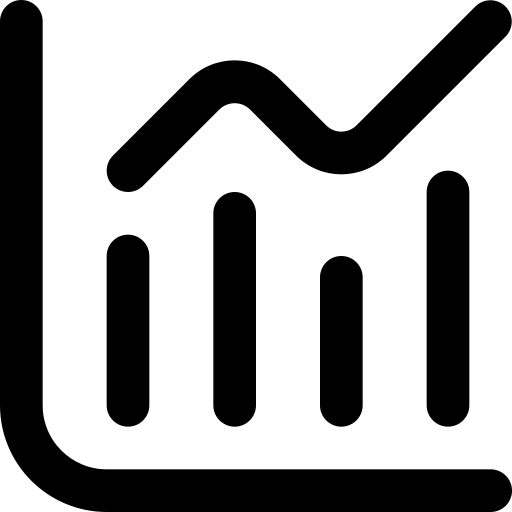
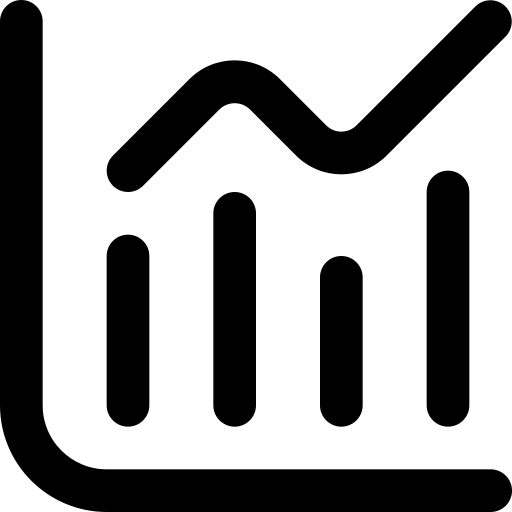
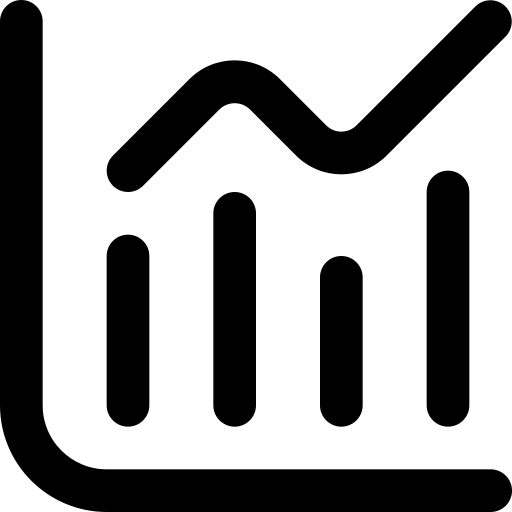
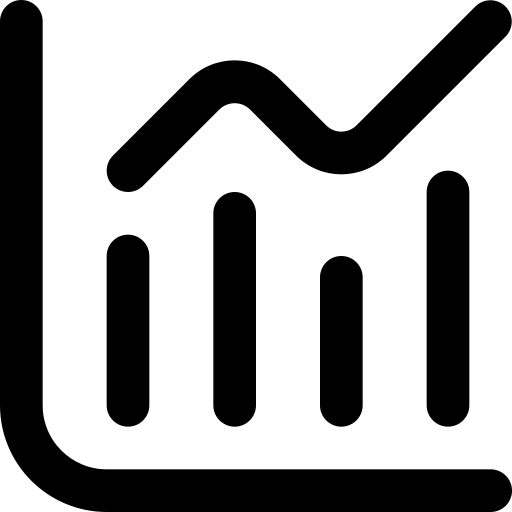
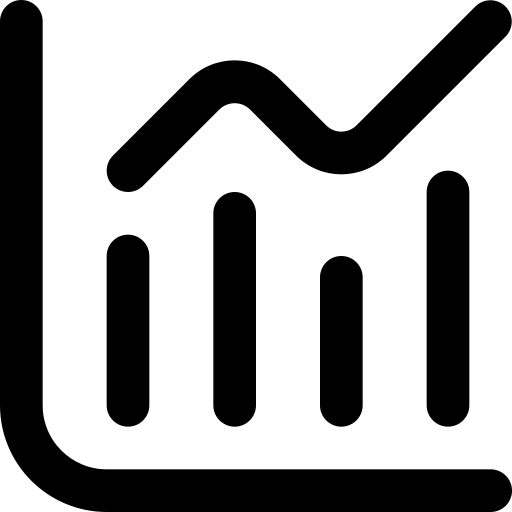
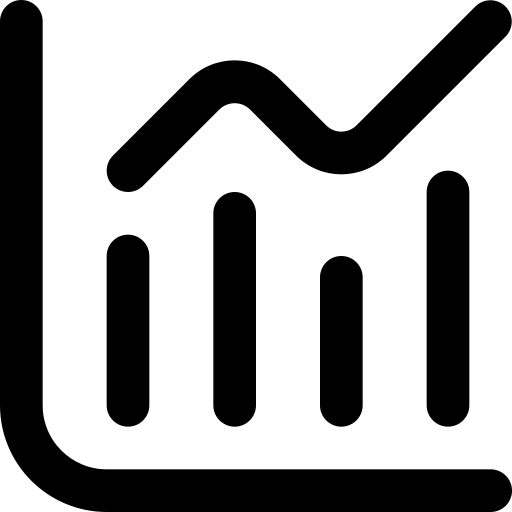
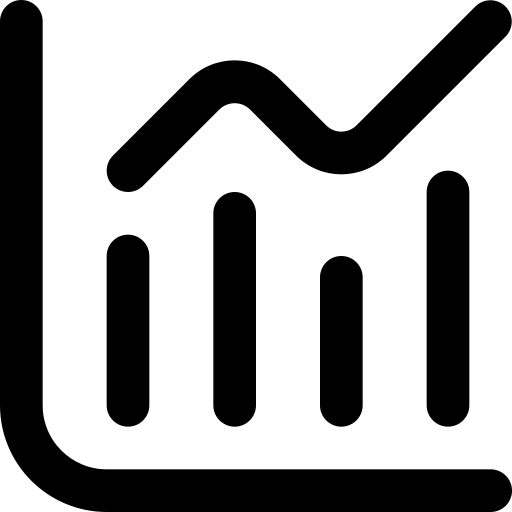
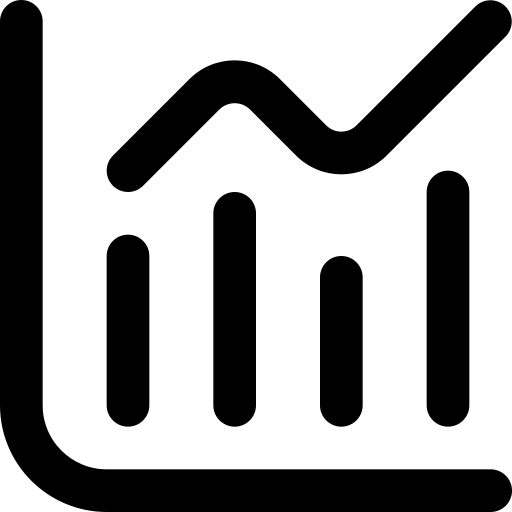
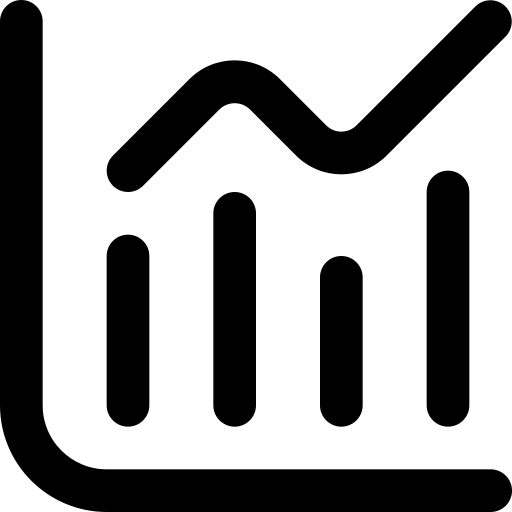
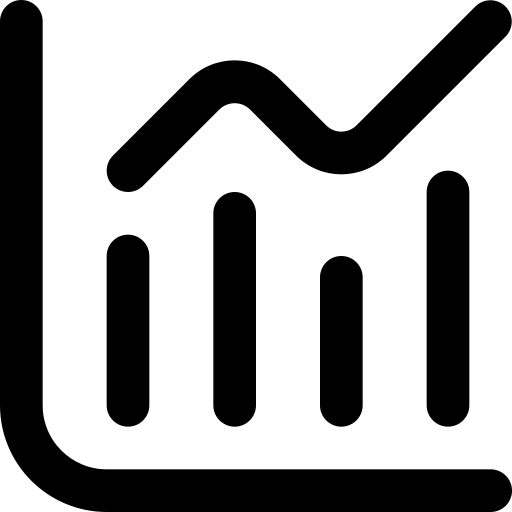
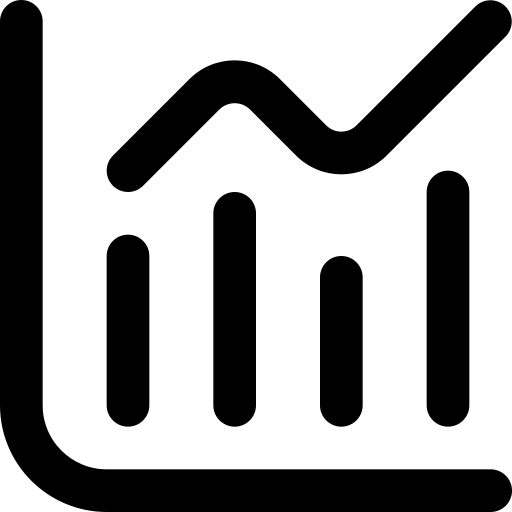
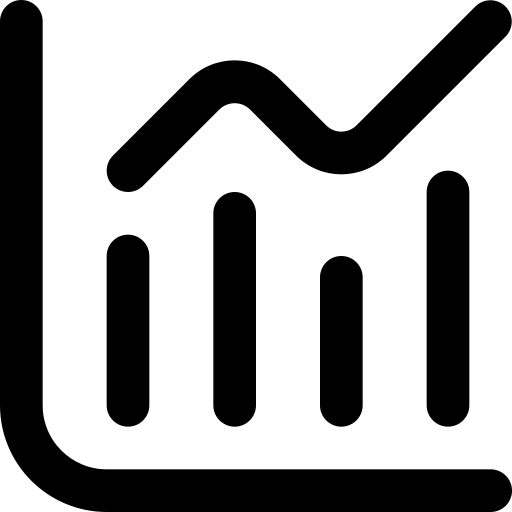
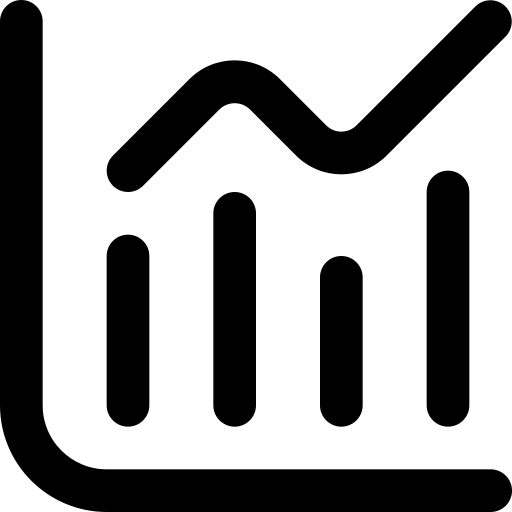
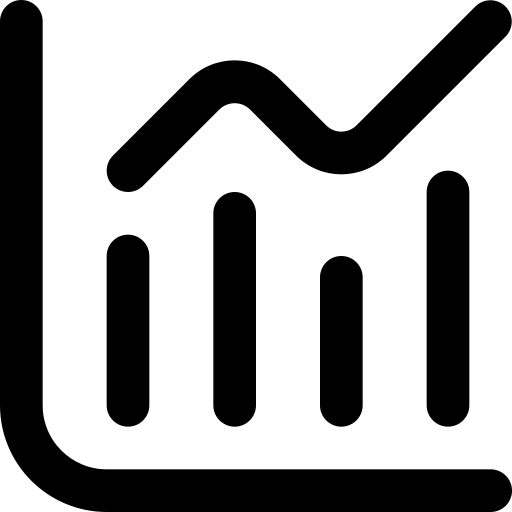
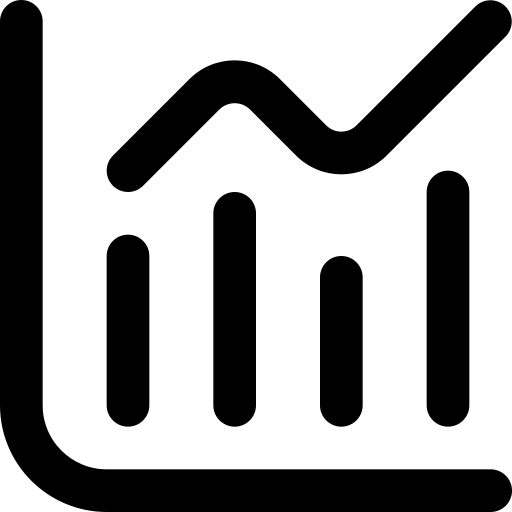
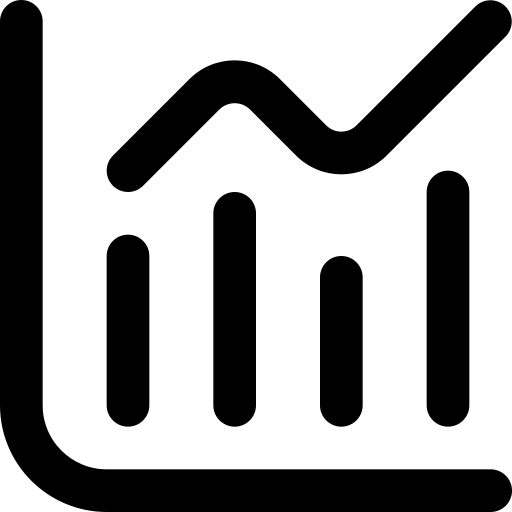
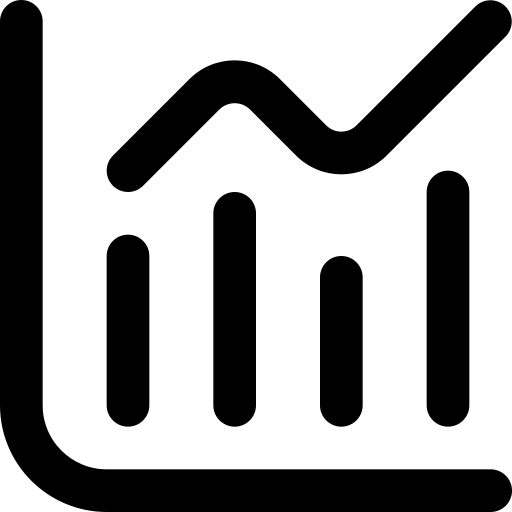
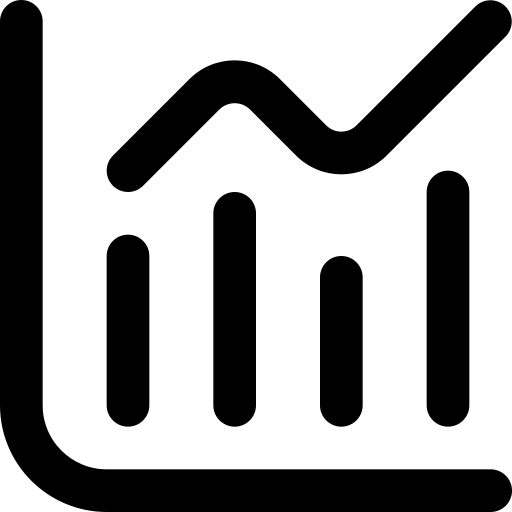
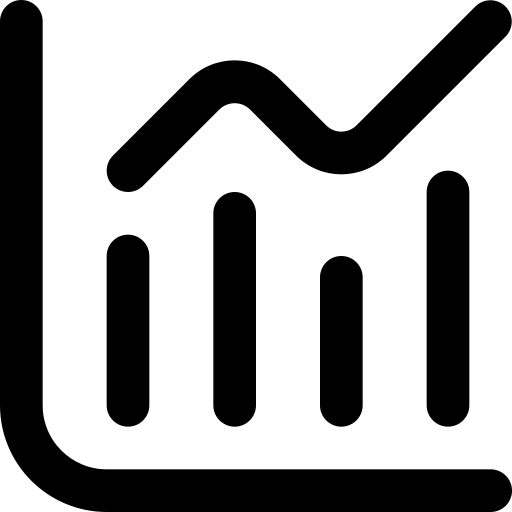
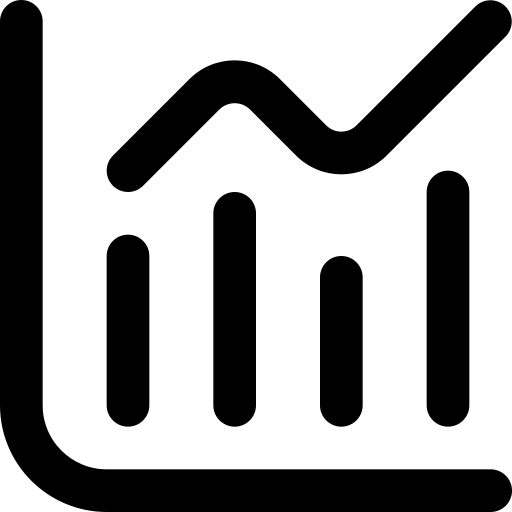
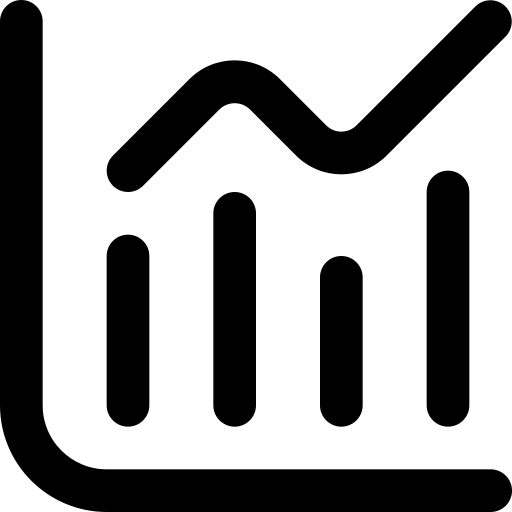
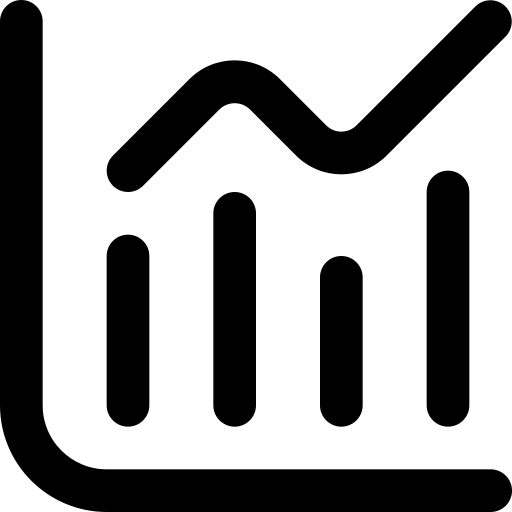
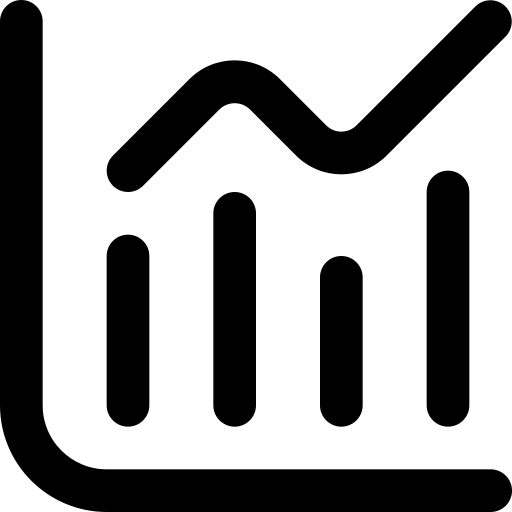
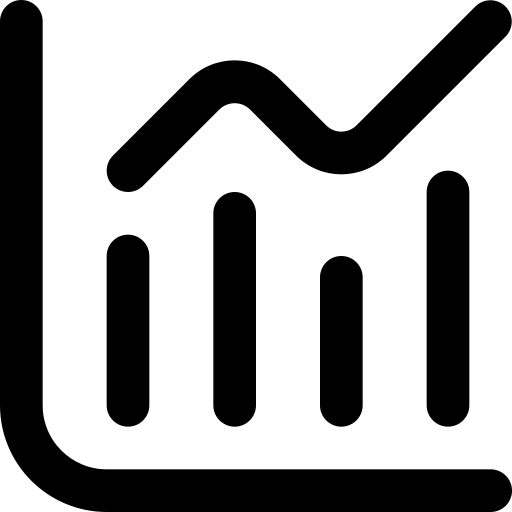
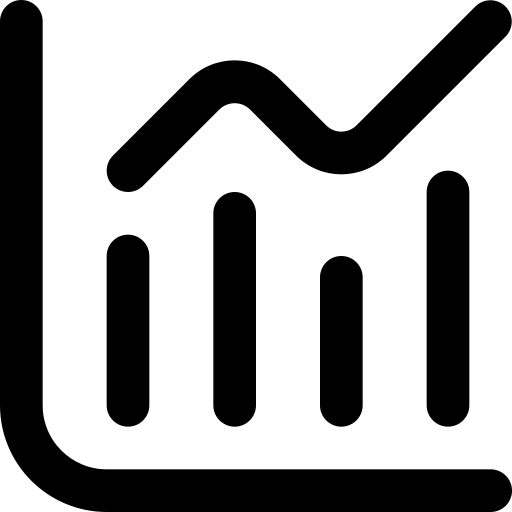
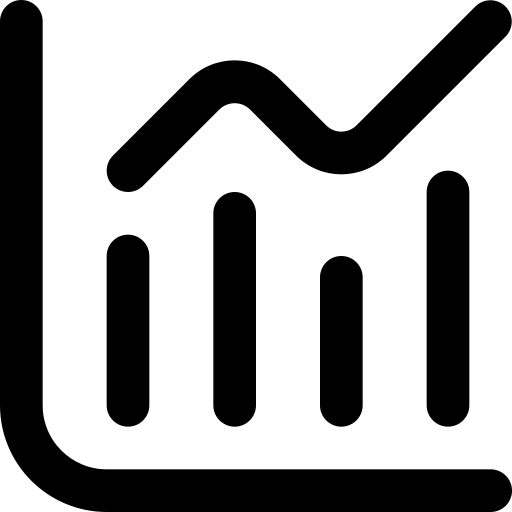
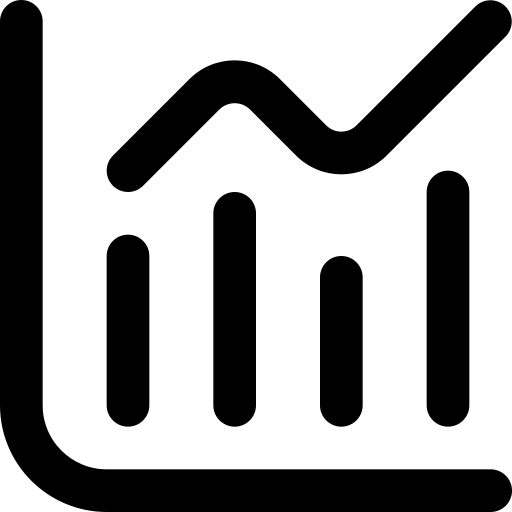
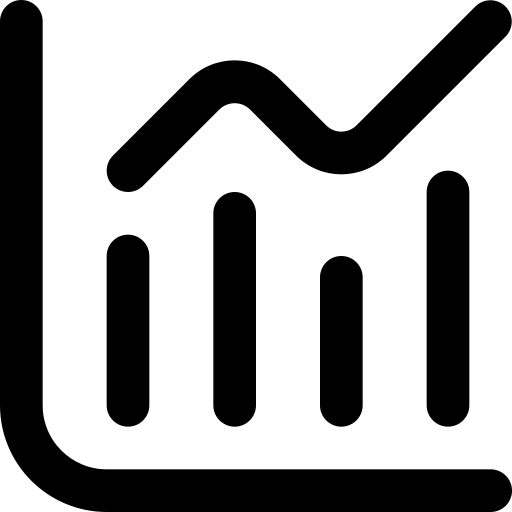
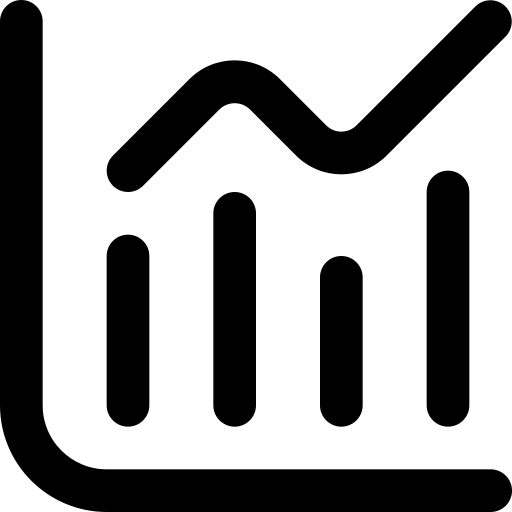
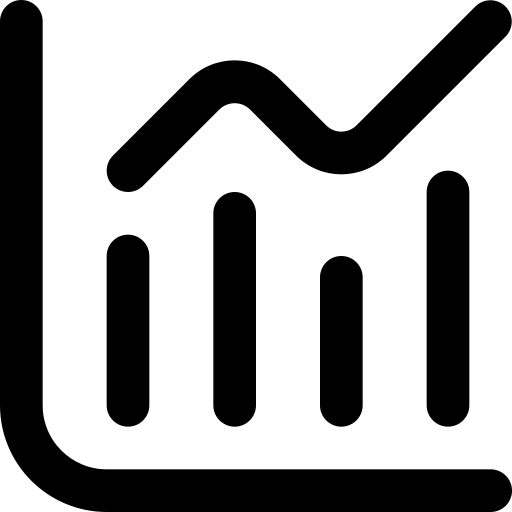
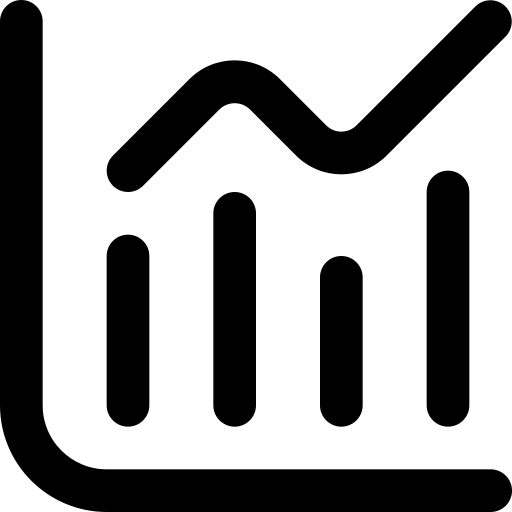

In [61]:
# 필터링 결과를 cbw.plot_by_radius()에 넣으면 완성
plot_2 = cbw.plot_by_radius(result_radius)
plot_2

In [62]:
df = df.loc[df['상권업종대분류명'].str.contains("숙박", na=False)]
df = df.rename(columns={'경도': 'lng', '위도': 'lat'})
df.index = range(len(df))

# 가능역
lat = 37.7483685951812
lng = 127.044220735748
dist = 1

# 반경 집계 인스턴스 생성
cbw = CountByWGS84(df, lat, lng, dist)

# 사각 범위 내 데이터 필터링
result_rectangle = cbw.filter_by_rectangle()

# 반경 범위 내 데이터 필터링
result_radius = cbw.filter_by_radius()

# 필터링 결과를 cbw.plot_by_radius()에 넣으면 완성
plot_2 = cbw.plot_by_radius(result_radius)
plot_2